In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from sklearn.svm import SVR

# EDA

Dataset features :
-   DateTime: This feature represents the date and time at which the data was recorded. Recorded at ten-minute intervals.
-   Temperature: This feature represents the weather temperature of Tetouan city at the recorded time. It is a continuous variable.
-   Humidity: This feature represents the humidity level of Tetouan city at the recorded time. It is a continuous variable.
-   Wind Speed: This feature represents the wind speed of Tetouan city at the recorded time. It is another continuous variable.
-   General Diffuse Flows: This feature represents general diffuse flows, which could be a measure of general flow patterns or phenomena in the city. It is a continuous variable.
-   Diffuse Flows: This feature represents diffuse flows, which could be a specific type of flow or movement in the city. It is also a continuous variable.
-   Zone 1 Power Consumption: This is one of the target variables. It represents the power consumption of zone 1 of Tetouan city at the recorded time. It is a continuous variable and likely serves as a target for prediction or analysis.
-   Zone 2 Power Consumption: Similarly, this feature represents the power consumption of zone 2 of Tetouan city. It is also a continuous variable and serves as another target for analysis.
-   Zone 3 Power Consumption: This feature represents the power consumption of zone 3 of Tetouan city. Like the previous zones, it is a continuous variable and serves as a target for analysis.

In [62]:
df = pd.read_csv("Tetuan City power consumption.csv")
df.head()

DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69620                16128.87538   
1          0.085               29814.68354                19375.07599   
2          0.100               29128.10127                19006.68693   
3          0.096               28228.86076                18361.09422   
4          0.085               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0                20240.96386  
1                20131.08434  
2                19668.43373  
3                18899.27711  
4                18442.40964

In [63]:
df.shape

(52416, 9)

In [64]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [65]:
df.describe()

Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52416.000000  52416.000000  52416.000000           52416.000000   
mean      18.810024     68.259518      1.959489             182.696614   
std        5.815476     15.551177      2.348862             264.400960   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.410000     58.310000      0.078000               0.062000   
50%       18.780000     69.860000      0.086000               5.035500   
75%       22.890000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count   52416.000000              52416.000000               52416.000000   
mean       75.028022              32344.970564               21042.509082   
std       124.210949               7130.562564                5201.465892   
min         0.011000              13895.696200                8560.081466   
25%         0.122000              26310.668692               16980.766032   
50%         4.456000              32265.920340               20823.168405   
75%       101.000000              37309.018185               24713.717520   
max       936.000000              52204.395120               37408.860760   

       Zone 3  Power Consumption  
count               52416.000000  
mean                17835.406218  
std                  6622.165099  
min                  5935.174070  
25%                 13129.326630  
50%                 16415.117470  
75%                 21624.100420  
max                 47598.326360

In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB
None


## Feature Engineering

---

In [67]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['DayOfMonth'] = df['DateTime'].dt.day
df['WeekOfYear'] = df['DateTime'].dt.isocalendar().week
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
df['Quarter'] = df['DateTime'].dt.quarter
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year
df['Season'] = df['DateTime'].dt.month % 12 // 3 + 1


In [68]:
columns = ['DateTime','Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows',
           'DayOfWeek', 'Hour', 'Minute', 'DayOfMonth', 'WeekOfYear', 'IsWeekend',
           'Quarter', 'Month', 'Year', 'Season',
           'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']
df = df[columns]

features = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows',
            'DayOfWeek', 'Hour', 'Minute', 'DayOfMonth', 'WeekOfYear', 'IsWeekend',
            'Quarter', 'Month', 'Year', 'Season']
X = df[features]
y1 = df['Zone 1 Power Consumption']
y2 = df['Zone 2  Power Consumption']
y3 = df['Zone 3  Power Consumption']
y1.head()

0    34055.69620
1    29814.68354
2    29128.10127
3    28228.86076
4    27335.69620
Name: Zone 1 Power Consumption, dtype: float64

In [69]:
# Scaling features and targets
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, 1:])  # Excluding the first column
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[1:])  # Excluding the first column


X_scaled = scaled_df.iloc[:, :-3]
y1_scaled = scaled_df['Zone 1 Power Consumption']
y2_scaled = scaled_df['Zone 2  Power Consumption']
y3_scaled = scaled_df['Zone 3  Power Consumption']

# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y1_scaled, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y2_scaled, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_scaled, y3_scaled, test_size=0.2, random_state=42)
X_train1.head()

Temperature  Humidity  Wind Speed  general diffuse flows  \
26890     1.953423 -1.043630    1.262969               0.943286   
36038     0.096292  1.436592   -0.703534              -0.690714   
27335     1.919032 -2.204325    1.258711              -0.423590   
9666     -1.112563  1.095778   -0.801881              -0.690782   
1977     -0.122093 -0.375507   -0.796346              -0.411866   

       diffuse flows  DayOfWeek      Hour   Minute  DayOfMonth  WeekOfYear  \
26890       0.284776        0.0  0.794547  0.87831   -1.103381    0.033315   
36038      -0.602996        0.5 -0.794547 -0.29277   -0.875376    0.632982   
27335      -0.020353        1.5  1.083473  1.46385   -0.761374    0.033315   
9666       -0.602731        0.0 -1.227936 -1.46385   -0.761374   -1.099389   
1977        0.066597        1.0  0.794547  0.29277   -0.191361   -1.632427   

       IsWeekend   Quarter     Month  Year    Season  
26890  -0.632456  0.443280  0.142129   0.0  0.441800  
36038  -0.632456  0.443280  0.723422   0.0  1.340210  
27335   1.581139  0.443280  0.142129   0.0  0.441800  
9666   -0.632456 -1.349541 -1.020456   0.0 -0.456609  
1977    1.581139 -1.349541 -1.601748   0.0 -1.355019

### Feature Selection :

In [70]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Feature selection for Zone 1
sfs_forward_1 = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward', scoring='neg_mean_squared_error', cv=5)
sfs_forward_1.fit(X_train1, y_train1)
selected_features_forward_1 = sfs_forward_1.get_support()
print("Selected features for Zone 1 (forward selection):", X.columns[selected_features_forward_1])

# Feature selection for Zone 2
sfs_forward_2 = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward', scoring='neg_mean_squared_error', cv=5)
sfs_forward_2.fit(X_train2, y_train2)
selected_features_forward_2 = sfs_forward_2.get_support()
print("Selected features for Zone 2 (forward selection):", X.columns[selected_features_forward_2])

# Feature selection for Zone 3
sfs_forward_3 = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward', scoring='neg_mean_squared_error', cv=5)
sfs_forward_3.fit(X_train3, y_train3)
selected_features_forward_3 = sfs_forward_3.get_support()
print("Selected features for Zone 3 (forward selection):", X.columns[selected_features_forward_3])

Selected features for Zone 1 (forward selection): Index(['Temperature', 'Wind Speed', 'diffuse flows', 'DayOfWeek', 'Hour',
       'IsWeekend', 'Month'],
      dtype='object')
Selected features for Zone 2 (forward selection): Index(['Temperature', 'diffuse flows', 'Hour', 'DayOfMonth', 'IsWeekend',
       'Quarter', 'Season'],
      dtype='object')
Selected features for Zone 3 (forward selection): Index(['Temperature', 'Wind Speed', 'general diffuse flows', 'diffuse flows',
       'Hour', 'Month', 'Season'],
      dtype='object')


In [71]:
# Update X_train and X_test with selected features for Zone 1
X_train1_selected = X_train1.iloc[:, selected_features_forward_1]
X_test1_selected = X_test1.iloc[:, selected_features_forward_1]

# Update X_train and X_test with selected features for Zone 2
X_train2_selected = X_train2.iloc[:, selected_features_forward_2]
X_test2_selected = X_test2.iloc[:, selected_features_forward_2]

# Update X_train and X_test with selected features for Zone 3
X_train3_selected = X_train3.iloc[:, selected_features_forward_3]
X_test3_selected = X_test3.iloc[:, selected_features_forward_3]
X_train3_selected = X_train3_selected.drop('general diffuse flows', axis=1)
X_test3_selected = X_test3_selected.drop('general diffuse flows', axis=1)

X_train3_selected.head()


Temperature  Wind Speed  diffuse flows      Hour     Month    Season
26890     1.953423    1.262969       0.284776  0.794547  0.142129  0.441800
36038     0.096292   -0.703534      -0.602996 -0.794547  0.723422  1.340210
27335     1.919032    1.258711      -0.020353  1.083473  0.142129  0.441800
9666     -1.112563   -0.801881      -0.602731 -1.227936 -1.020456 -0.456609
1977     -0.122093   -0.796346       0.066597  0.794547 -1.601748 -1.355019

## Vizualisation :


---



### Histograms

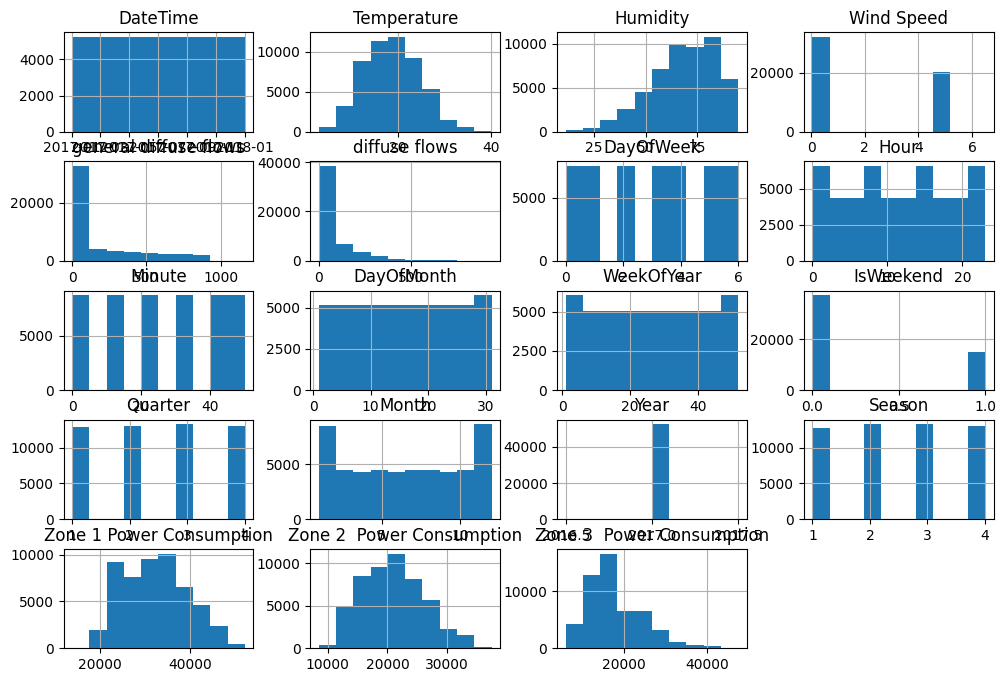

In [72]:
df.hist(figsize=(12, 8))
plt.show()

### Time Series

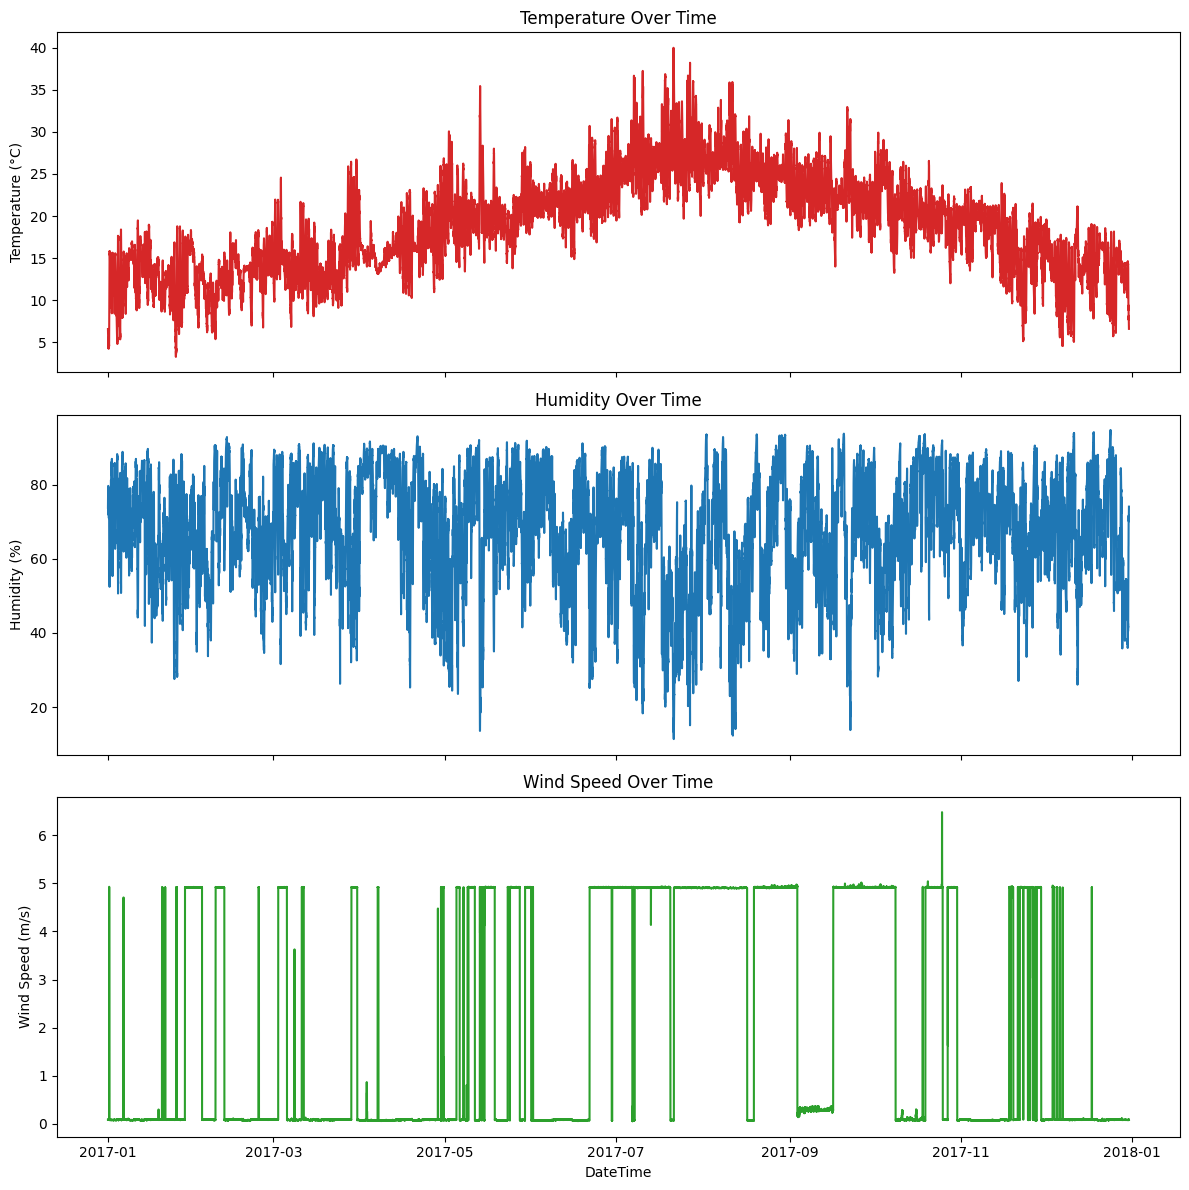

In [73]:
# Convert DateTime to pandas datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set DateTime as the index
df.set_index('DateTime', inplace=True)

# Plotting Temperature, Humidity, and Wind Speed over time
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Temperature time series plot
axs[0].plot(df.index, df['Temperature'], color='tab:red')
axs[0].set_title('Temperature Over Time')
axs[0].set_ylabel('Temperature (°C)')

# Humidity time series plot
axs[1].plot(df.index, df['Humidity'], color='tab:blue')
axs[1].set_title('Humidity Over Time')
axs[1].set_ylabel('Humidity (%)')

# Wind Speed time series plot
axs[2].plot(df.index, df['Wind Speed'], color='tab:green')
axs[2].set_title('Wind Speed Over Time')
axs[2].set_ylabel('Wind Speed (m/s)')
axs[2].set_xlabel('DateTime')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Correlation Heatmap

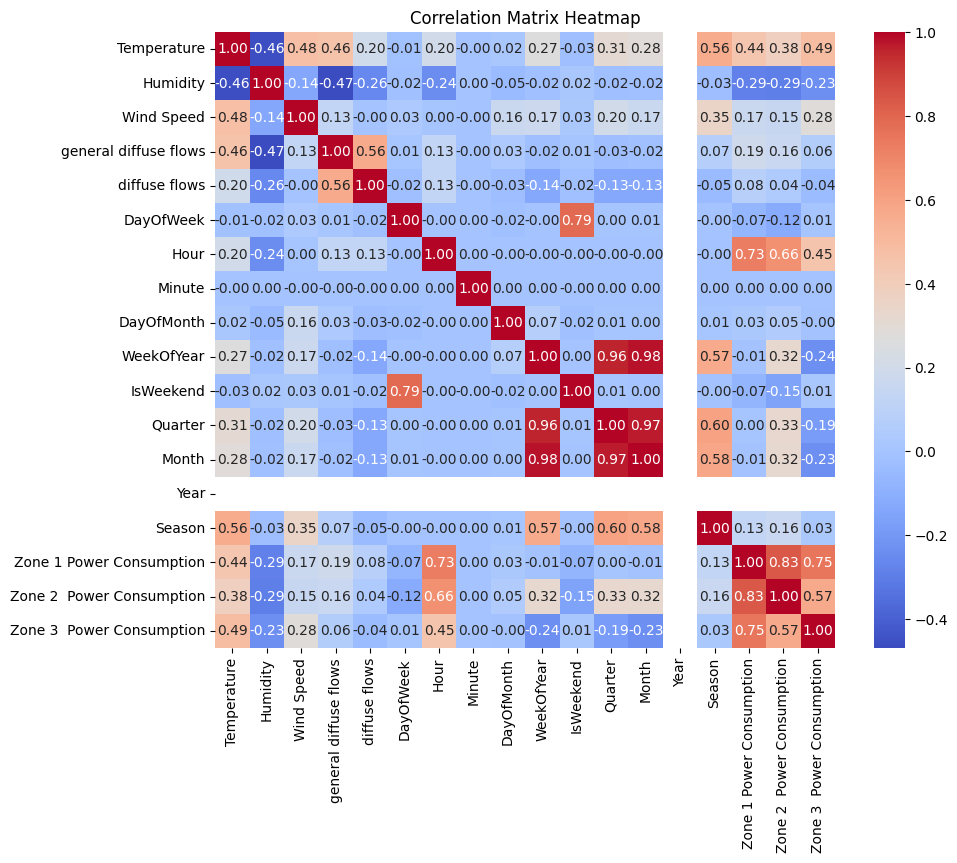

In [74]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# KNN

**We have 3 target variables : how to perform KNN ?**

Performing K-Nearest Neighbors (KNN) for a multi-output regression problem, where you have multiple target variables, is similar to performing it for a single-output regression problem. we'll create a separate KNN model for each target variable and then train and predict independently for each one.



---
Model Training :
For a beginning let's choose k to be 5 for all 3 targets and perform the KNN Regressor from scikit-learn Library:

In [75]:
knn_zone1 = KNeighborsRegressor(n_neighbors=5)
knn_zone2 = KNeighborsRegressor(n_neighbors=5)
knn_zone3 = KNeighborsRegressor(n_neighbors=5)


knn_zone1.fit(X_train1_selected, y_train1)
knn_zone2.fit(X_train2_selected, y_train2)
knn_zone3.fit(X_train3_selected, y_train3)


y_pred_zone1 = knn_zone1.predict(X_test1_selected)
y_pred_zone2 = knn_zone2.predict(X_test2_selected)
y_pred_zone3 = knn_zone3.predict(X_test3_selected)

Model Evaluation :

In [76]:
mse_z1 = mean_squared_error(y_test1, y_pred_zone1)
mae_z1 = mean_absolute_error(y_test1, y_pred_zone1)
r2_z1 = r2_score(y_test1, y_pred_zone1)

y_pred_train_zone1 = knn_zone1.predict(X_train1_selected)

mse_train_z1 = mean_squared_error(y_train1, y_pred_train_zone1)
mae_train_z1 = mean_absolute_error(y_train1, y_pred_train_zone1)
r2_train_z1 = r2_score(y_train1, y_pred_train_zone1)


print("\nComparison of Performance Metrics (Zone 1):")
print("Training MSE vs Testing MSE:", mse_train_z1, "vs", mse_z1)
print("Training MAE vs Testing MAE:", mae_train_z1, "vs", mae_z1)
print("Training R2 vs Testing R2:", r2_train_z1, "vs", r2_z1)



Comparison of Performance Metrics (Zone 1):
Training MSE vs Testing MSE: 0.021384945808541698 vs 0.03487120756498583
Training MAE vs Testing MAE: 0.09307278288281484 vs 0.12293656535196301
Training R2 vs Testing R2: 0.9786514009596398 vs 0.9648873836143899


In [77]:
mse_z2 = mean_squared_error(y_test2 ,y_pred_zone2)
mae_z2 = mean_absolute_error(y_test2, y_pred_zone2)
r2_z2 = r2_score(y_test2, y_pred_zone2)

y_pred_train_zone2 = knn_zone2.predict(X_train2_selected)

mse_train_z2 = mean_squared_error(y_train2, y_pred_train_zone2)
mae_train_z2 = mean_absolute_error(y_train2, y_pred_train_zone2)
r2_train_z2 = r2_score(y_train2, y_pred_train_zone2)

print("\nComparison of Performance Metrics (Zone 2):")
print("Training MSE vs Testing MSE:", mse_train_z2, "vs", mse_z2)
print("Training MAE vs Testing MAE:", mae_train_z2, "vs", mae_z2)
print("Training R2 vs Testing R2:", r2_train_z2, "vs", r2_z2)


Comparison of Performance Metrics (Zone 2):
Training MSE vs Testing MSE: 0.01834249677515737 vs 0.02914611719971808
Training MAE vs Testing MAE: 0.08536710735740705 vs 0.11197977467179503
Training R2 vs Testing R2: 0.9816682620674059 vs 0.9707835818245064


In [78]:
mse_z3 = mean_squared_error(y_test3, y_pred_zone3)
mae_z3 = mean_absolute_error(y_test3, y_pred_zone3)
r2_z3 = r2_score(y_test3, y_pred_zone3)

y_pred_train_zone3 = knn_zone3.predict(X_train3_selected)

mse_train_z3 = mean_squared_error(y_train3, y_pred_train_zone3)
mae_train_z3 = mean_absolute_error(y_train3, y_pred_train_zone3)
r2_train_z3 = r2_score(y_train3, y_pred_train_zone3)

print("\nComparison of Performance Metrics(Zone 3) :")
print("Training MSE vs Testing MSE:", mse_train_z3, "vs", mse_z3)
print("Training MAE vs Testing MAE:", mae_train_z3, "vs", mae_z3)
print("Training R2 vs Testing R2:", r2_train_z3, "vs", r2_z3)



Comparison of Performance Metrics(Zone 3) :
Training MSE vs Testing MSE: 0.027459846788881293 vs 0.04237520405235932
Training MAE vs Testing MAE: 0.09695092766787593 vs 0.12338160516183974
Training R2 vs Testing R2: 0.9725781282604397 vs 0.957384069093626


Hyperparameter Tuning :
Performing a grid search to identify the best parameters for the model

Grid Search

In [79]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 20)}

gridsearch_Zone1 = GridSearchCV(KNeighborsRegressor(), parameters, cv=5, scoring='neg_mean_squared_error')

gridsearch_Zone1.fit(X_train1_selected, y_train1)


best_params = gridsearch_Zone1.best_params_
best_score = -gridsearch_Zone1.best_score_

print("Best param:", best_params)
print("Best Mean Squared Error:", best_score)

Best param: {'n_neighbors': 2}
Best Mean Squared Error: 0.03520569239930065


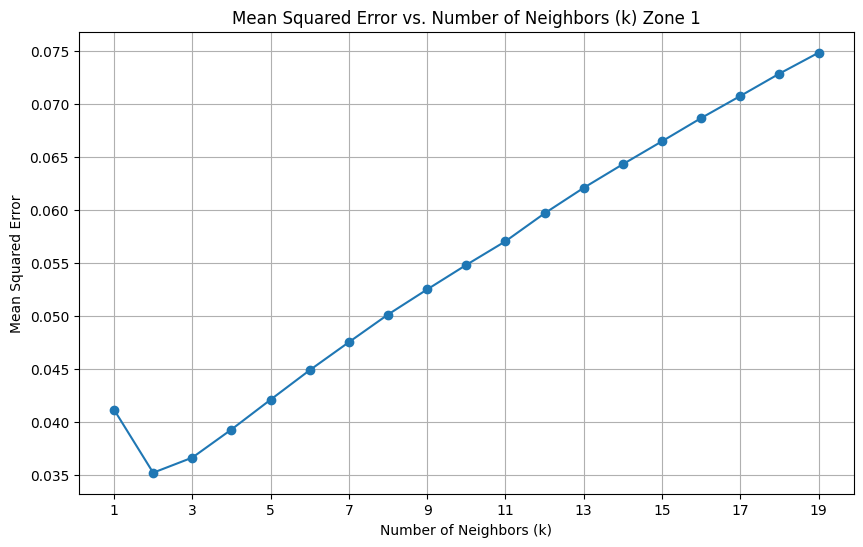

In [80]:
k_values_Zone1 = [params['n_neighbors'] for params in gridsearch_Zone1.cv_results_['params']]
mean_squared_errors_Zone1 = [-score for score in gridsearch_Zone1.cv_results_['mean_test_score']]

# Plot k values vs. mean squared errors
plt.figure(figsize=(10, 6))
plt.plot(k_values_Zone1, mean_squared_errors_Zone1, marker='o', linestyle='-')
plt.title('Mean Squared Error vs. Number of Neighbors (k) Zone 1')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, 21, 2))
plt.grid(True)
plt.show()

**We can clearly see the elbow point at k = 2.**


In [81]:
from sklearn.model_selection import GridSearchCV


gridsearch_Zone2 = GridSearchCV(KNeighborsRegressor(), parameters, cv=5, scoring='neg_mean_squared_error')

gridsearch_Zone2.fit(X_train2_selected, y_train2)

best_params = gridsearch_Zone2.best_params_
best_score = -gridsearch_Zone2.best_score_

print("Best param:", best_params)
print("Best Mean Squared Error:", best_score)

Best param: {'n_neighbors': 2}
Best Mean Squared Error: 0.0295683711368329


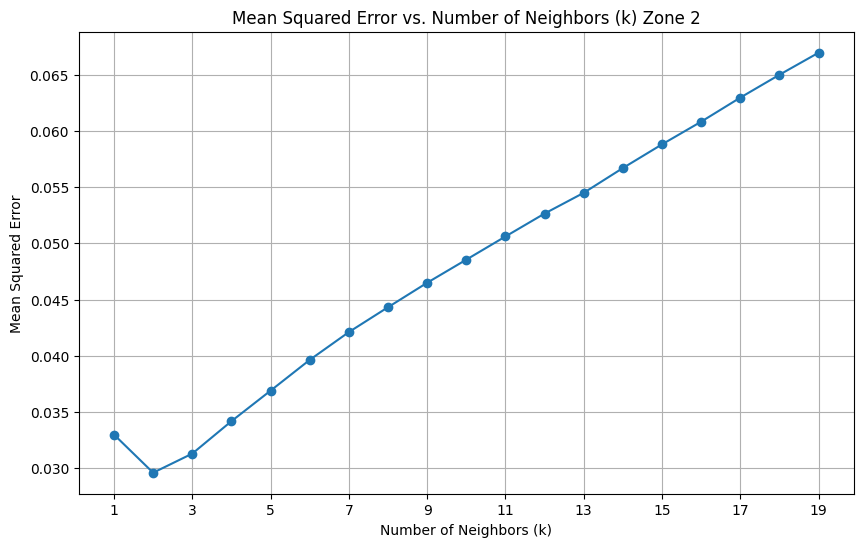

In [82]:
k_values_Zone2 = [params['n_neighbors'] for params in gridsearch_Zone2.cv_results_['params']]
mean_squared_errors_Zone2 = [-score for score in gridsearch_Zone2.cv_results_['mean_test_score']]


plt.figure(figsize=(10, 6))
plt.plot(k_values_Zone2, mean_squared_errors_Zone2, marker='o', linestyle='-')
plt.title('Mean Squared Error vs. Number of Neighbors (k) Zone 2')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, 21, 2))
plt.grid(True)
plt.show()

**We can clearly see the elbow point at k = 2.**


In [83]:
from sklearn.model_selection import GridSearchCV

gridsearch_Zone3 = GridSearchCV(KNeighborsRegressor(), parameters, cv=5, scoring='neg_mean_squared_error')

gridsearch_Zone3.fit(X_train3_selected, y_train3)

best_params = gridsearch_Zone3.best_params_
best_score = -gridsearch_Zone3.best_score_  # Convert negative MSE to positive
print("Best param:", best_params)
print("Best Mean Squared Error:", best_score)

Best param: {'n_neighbors': 5}
Best Mean Squared Error: 0.045585822187610946


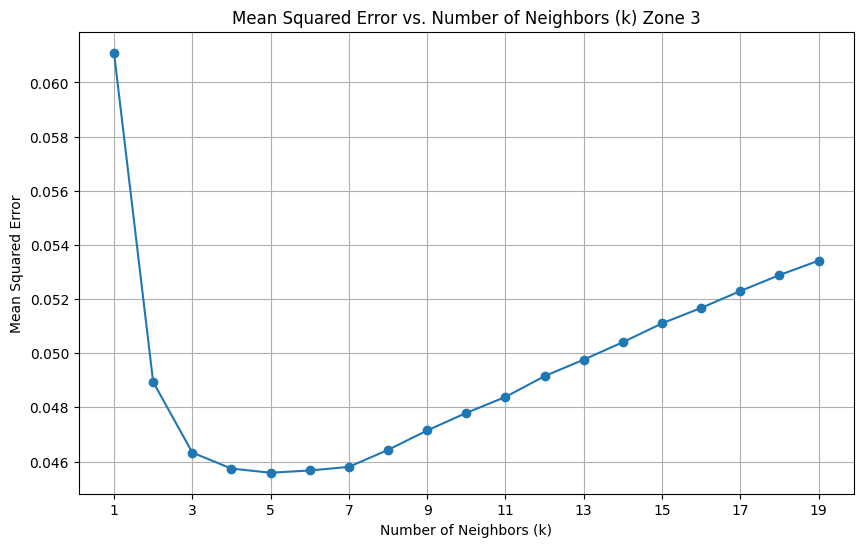

In [84]:
k_values_Zone3 = [params['n_neighbors'] for params in gridsearch_Zone3.cv_results_['params']]
mean_squared_errors_Zone3 = [-score for score in gridsearch_Zone3.cv_results_['mean_test_score']]

# Plot k values vs. mean squared errors
plt.figure(figsize=(10, 6))
plt.plot(k_values_Zone3, mean_squared_errors_Zone3, marker='o', linestyle='-')
plt.title('Mean Squared Error vs. Number of Neighbors (k) Zone 3')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, 21, 2))
plt.grid(True)
plt.show()

**We can clearly see the elbow point at k = 5.**

### Let's use the optimal parameters to predict :

In [85]:
# Initialize KNN regressor for each target variable
knn_zone1_2 = KNeighborsRegressor(n_neighbors=2)
knn_zone2_2 = KNeighborsRegressor(n_neighbors=2)
knn_zone3_5 = KNeighborsRegressor(n_neighbors=5)

knn_zone1_2.fit(X_train1_selected, y_train1)
knn_zone2_2.fit(X_train2_selected, y_train2)
knn_zone3_5.fit(X_train3_selected, y_train3)


y_pred_zone1_2 = knn_zone1_2.predict(X_test1_selected)
y_pred_zone2_2 = knn_zone2_2.predict(X_test2_selected)
y_pred_zone3_5 = knn_zone3_5.predict(X_test3_selected)

In [86]:
mse_z1_2 = mean_squared_error(y_test1, y_pred_zone1_2)
mae_z1_2 = mean_absolute_error(y_test1, y_pred_zone1_2)
r2_z1_2 = r2_score(y_test1, y_pred_zone1_2)

y_pred_train_zone1_2 = knn_zone1_2.predict(X_train1_selected)

mse_train_z1_2 = mean_squared_error(y_train1, y_pred_train_zone1_2)
mae_train_z1_2 = mean_absolute_error(y_train1, y_pred_train_zone1_2)
r2_train_z1_2 = r2_score(y_train1, y_pred_train_zone1_2)


print("\nComparison of Performance Metrics: (Zone 1 optimal)")
print("Training MSE vs Testing MSE:", mse_train_z1_2, "vs", mse_z1_2)
print("Training MAE vs Testing MAE:", mae_train_z1_2, "vs", mae_z1_2)
print("Training R2 vs Testing R2:", r2_train_z1_2, "vs", r2_z1_2)



Comparison of Performance Metrics: (Zone 1 optimal)
Training MSE vs Testing MSE: 0.009285895795041781 vs 0.030922395664888212
Training MAE vs Testing MAE: 0.0555011924355402 vs 0.10429660601401318
Training R2 vs Testing R2: 0.9907298869104577 vs 0.9688635326241042


In [87]:
mse_z2_2 = mean_squared_error(y_test2 ,y_pred_zone2_2)
mae_z2_2 = mean_absolute_error(y_test2, y_pred_zone2_2)
r2_z2_2 = r2_score(y_test2, y_pred_zone2_2)

y_pred_train_zone2_2 = knn_zone2_2.predict(X_train2_selected)

mse_train_z2_2 = mean_squared_error(y_train2, y_pred_train_zone2_2)
mae_train_z2_2 = mean_absolute_error(y_train2, y_pred_train_zone2_2)
r2_train_z2_2 = r2_score(y_train2, y_pred_train_zone2_2)

print("\nComparison of Performance Metrics (Zone 2 optimal):")
print("Training MSE vs Testing MSE:", mse_train_z2_2, "vs", mse_z2_2)
print("Training MAE vs Testing MAE:", mae_train_z2_2, "vs", mae_z2_2)
print("Training R2 vs Testing R2:", r2_train_z2_2, "vs", r2_z2_2)


Comparison of Performance Metrics (Zone 2 optimal):
Training MSE vs Testing MSE: 0.007229645299078769 vs 0.023804640696612596
Training MAE vs Testing MAE: 0.048235084516200226 vs 0.09159985368973571
Training R2 vs Testing R2: 0.9927745952695044 vs 0.9761379420681005


In [88]:
mse_z3_5 = mean_squared_error(y_test3, y_pred_zone3_5)
mae_z3_5 = mean_absolute_error(y_test3, y_pred_zone3_5)
r2_z3_5 = r2_score(y_test3, y_pred_zone3_5)

y_pred_train_zone3_5 = knn_zone3_5.predict(X_train3_selected)

mse_train_z3_5 = mean_squared_error(y_train3, y_pred_train_zone3_5)
mae_train_z3_5 = mean_absolute_error(y_train3, y_pred_train_zone3_5)
r2_train_z3_5 = r2_score(y_train3, y_pred_train_zone3_5)

print("\nComparison of Performance Metrics(Zone 3) :")
print("Training MSE vs Testing MSE:", mse_train_z3_5, "vs", mse_z3_5)
print("Training MAE vs Testing MAE:", mae_train_z3_5, "vs", mae_z3_5)
print("Training R2 vs Testing R2:", r2_train_z3_5, "vs", r2_z3_5)



Comparison of Performance Metrics(Zone 3) :
Training MSE vs Testing MSE: 0.027459846788881293 vs 0.04237520405235932
Training MAE vs Testing MAE: 0.09695092766787593 vs 0.12338160516183974
Training R2 vs Testing R2: 0.9725781282604397 vs 0.957384069093626


To visualize better the performance of the model, we plot the predicted values against the true values. This allows us to observe how closely the model's predictions align with the actual values across the entire range of the data:

We took Zone 3 as an example, Since the datapoints are clustered closely around the perfect prediction diagonal line, the model is hence likely accurate.

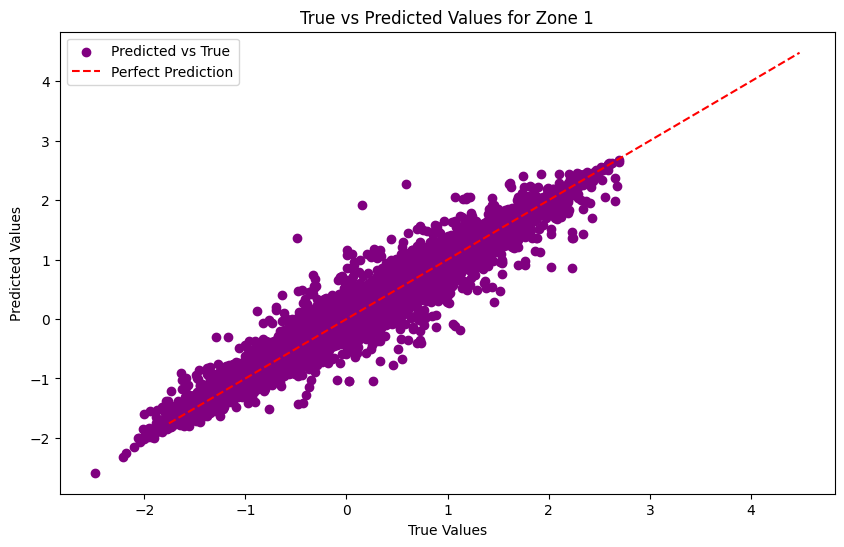

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_pred_zone1_2, color='purple', label='Predicted vs True')
plt.plot([y_test3.min(), y_test3.max()],
         [y_test3.min(), y_test3.max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('True vs Predicted Values for Zone 1')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

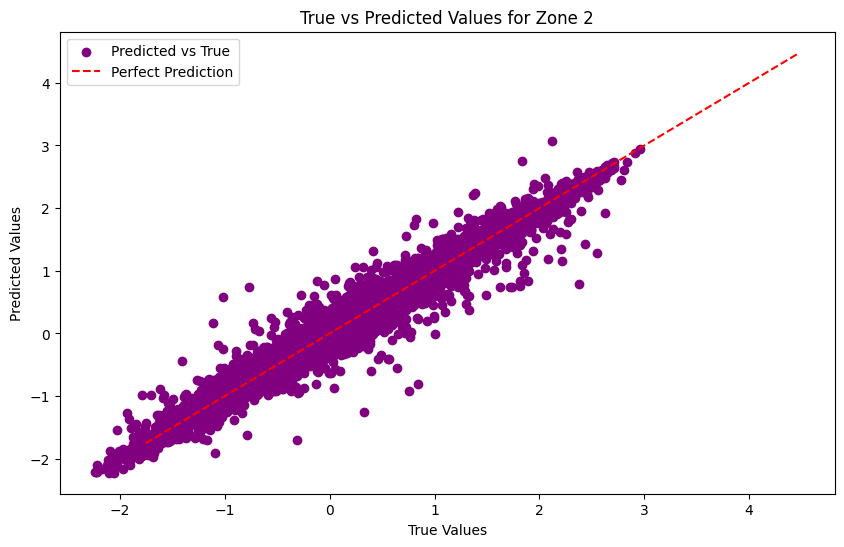

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred_zone2_2, color='purple', label='Predicted vs True')
plt.plot([y_test3.min(), y_test3.max()],
         [y_test3.min(), y_test3.max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('True vs Predicted Values for Zone 2')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

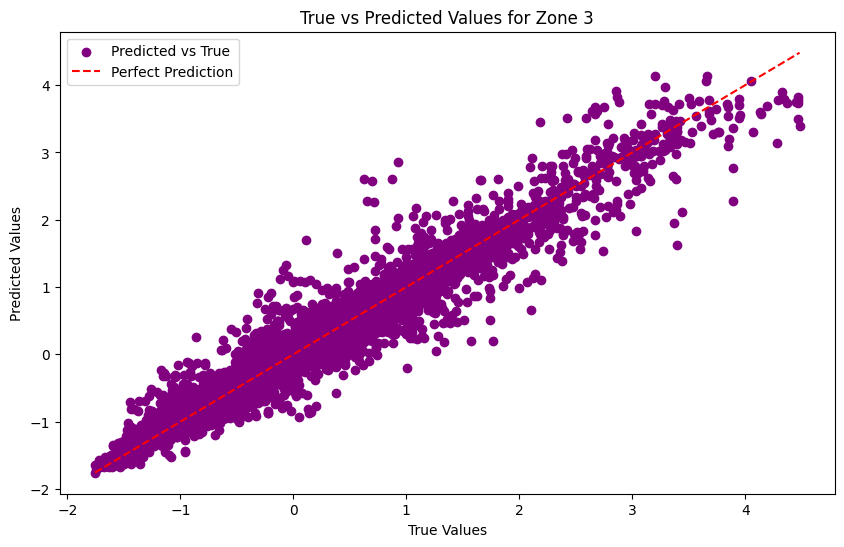

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test3, y_pred_zone3_5, color='purple', label='Predicted vs True')
plt.plot([y_test3.min(), y_test3.max()],
         [y_test3.min(), y_test3.max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('True vs Predicted Values for Zone 3')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Decision Tree Learning and Random Forests


We have a dataset with three target variables: Zone 1 Power Consumption, Zone 2 Power Consumption, and Zone 3 Power Consumption. When performing Random Forest and Decision Tree for a multi-output regression problem like this, where there are multiple target variables, we approach it similarly to a single-output regression problem. Each target variable will have its own separate Random Forest and Decision Tree model. This allows us to train and predict independently for each target variable, ensuring that the models capture the unique relationships between the features and each target variable.

Model Training :


In [92]:
# Decision Tree Models
dt_zone1 = DecisionTreeRegressor(random_state=42)
dt_zone2 = DecisionTreeRegressor(random_state=42)
dt_zone3 = DecisionTreeRegressor(random_state=42)

# Random Forest Models
rf_zone1 = RandomForestRegressor(random_state=42)
rf_zone2 = RandomForestRegressor(random_state=42)
rf_zone3 = RandomForestRegressor(random_state=42)

In [93]:
# Train the models for each target variable using selected features
dt_zone1.fit(X_train1_selected, y_train1)
dt_zone2.fit(X_train2_selected, y_train2)
dt_zone3.fit(X_train3_selected, y_train3)

rf_zone1.fit(X_train1_selected, y_train1)
rf_zone2.fit(X_train2_selected, y_train2)
rf_zone3.fit(X_train3_selected, y_train3)

RandomForestRegressor(random_state=42)

Model Prediction :

In [94]:
# Predict the target variables on the test set using selected features
y_pred_dt_zone1 = dt_zone1.predict(X_test1_selected)
y_pred_dt_zone2 = dt_zone2.predict(X_test2_selected)
y_pred_dt_zone3 = dt_zone3.predict(X_test3_selected)

y_pred_rf_zone1 = rf_zone1.predict(X_test1_selected)
y_pred_rf_zone2 = rf_zone2.predict(X_test2_selected)
y_pred_rf_zone3 = rf_zone3.predict(X_test3_selected)

Model Evaluation :

In [95]:
# Evaluate Decision Tree Models
mse_dt_zone1 = mean_squared_error(y_test1, y_pred_dt_zone1)
mae_dt_zone1 = mean_absolute_error(y_test1, y_pred_dt_zone1)
r2_dt_zone1 = r2_score(y_test1, y_pred_dt_zone1)

print("Zone 1 - Decision Tree:")
print("Mean Squared Error (MSE):", mse_dt_zone1)
print("Mean Absolute Error (MAE):", mae_dt_zone1)
print("R-squared (R2):", r2_dt_zone1)

mse_dt_zone2 = mean_squared_error(y_test2, y_pred_dt_zone2)
mae_dt_zone2 = mean_absolute_error(y_test2, y_pred_dt_zone2)
r2_dt_zone2 = r2_score(y_test2, y_pred_dt_zone2)

print("\nZone 2 - Decision Tree:")
print("Mean Squared Error (MSE):", mse_dt_zone2)
print("Mean Absolute Error (MAE):", mae_dt_zone2)
print("R-squared (R2):", r2_dt_zone2)

mse_dt_zone3 = mean_squared_error(y_test3, y_pred_dt_zone3)
mae_dt_zone3 = mean_absolute_error(y_test3, y_pred_dt_zone3)
r2_dt_zone3 = r2_score(y_test3, y_pred_dt_zone3)

print("\nZone 3 - Decision Tree:")
print("Mean Squared Error (MSE):", mse_dt_zone3)
print("Mean Absolute Error (MAE):", mae_dt_zone3)
print("R-squared (R2):", r2_dt_zone3)

Zone 1 - Decision Tree:
Mean Squared Error (MSE): 0.04846247129311281
Mean Absolute Error (MAE): 0.13500899577343847
R-squared (R2): 0.9512020293406089

Zone 2 - Decision Tree:
Mean Squared Error (MSE): 0.03419822320472407
Mean Absolute Error (MAE): 0.10955463684346585
R-squared (R2): 0.9657192900460254

Zone 3 - Decision Tree:
Mean Squared Error (MSE): 0.047435413535821126
Mean Absolute Error (MAE): 0.12405120931784866
R-squared (R2): 0.9522951133578015


In [96]:
# Evaluate Random Forest Models using selected features
mse_rf_zone1 = mean_squared_error(y_test1, y_pred_rf_zone1)
mae_rf_zone1 = mean_absolute_error(y_test1, y_pred_rf_zone1)
r2_rf_zone1 = r2_score(y_test1, y_pred_rf_zone1)

print("\nZone 1 - Random Forest:")
print("Mean Squared Error (MSE):", mse_rf_zone1)
print("Mean Absolute Error (MAE):", mae_rf_zone1)
print("R-squared (R2):", r2_rf_zone1)

mse_rf_zone2 = mean_squared_error(y_test2, y_pred_rf_zone2)
mae_rf_zone2 = mean_absolute_error(y_test2, y_pred_rf_zone2)
r2_rf_zone2 = r2_score(y_test2, y_pred_rf_zone2)

print("\nZone 2 - Random Forest:")
print("Mean Squared Error (MSE):", mse_rf_zone2)
print("Mean Absolute Error (MAE):", mae_rf_zone2)
print("R-squared (R2):", r2_rf_zone2)

mse_rf_zone3 = mean_squared_error(y_test3, y_pred_rf_zone3)
mae_rf_zone3 = mean_absolute_error(y_test3, y_pred_rf_zone3)
r2_rf_zone3 = r2_score(y_test3, y_pred_rf_zone3)

print("\nZone 3 - Random Forest:")
print("Mean Squared Error (MSE):", mse_rf_zone3)
print("Mean Absolute Error (MAE):", mae_rf_zone3)
print("R-squared (R2):", r2_rf_zone3)


Zone 1 - Random Forest:
Mean Squared Error (MSE): 0.02579671147442499
Mean Absolute Error (MAE): 0.107767503234532
R-squared (R2): 0.9740247012575138

Zone 2 - Random Forest:
Mean Squared Error (MSE): 0.02136036004284273
Mean Absolute Error (MAE): 0.09439530651308684
R-squared (R2): 0.9785881183721846

Zone 3 - Random Forest:
Mean Squared Error (MSE): 0.02600864269594524
Mean Absolute Error (MAE): 0.10002990210584774
R-squared (R2): 0.9738436063050118


We will create plots comparing predicted values against actual values for each zone and each model (Decision Tree and Random Forest) to visually assess the performance of the models. These scatter plots help us understand how well the models' predictions align with the true values.


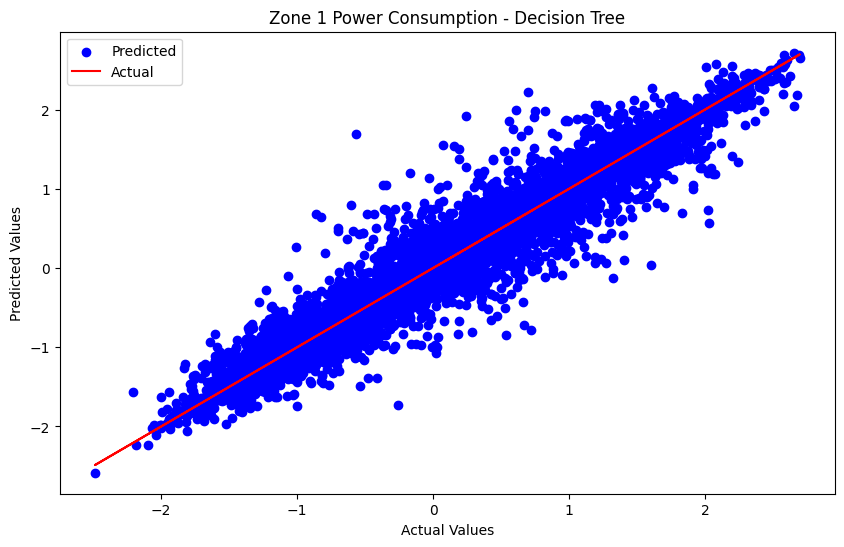

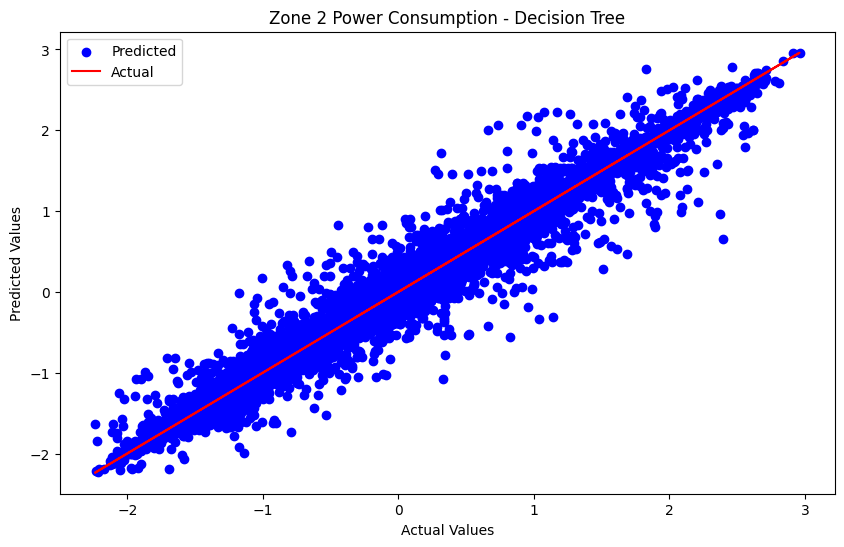

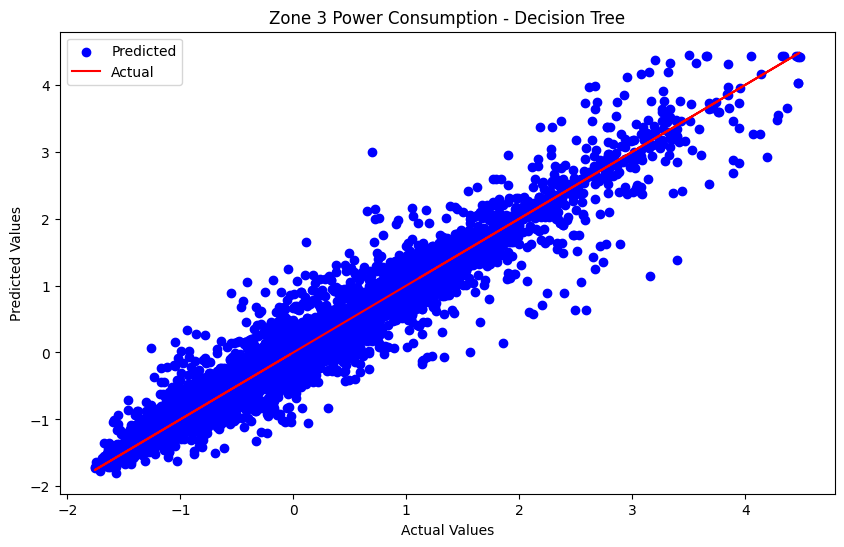

In [97]:
# Plot Decision Tree Models for Zone 1
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_pred_dt_zone1, color='blue', label='Predicted')
plt.plot(y_test1, y_test1, color='red', label='Actual')
plt.title('Zone 1 Power Consumption - Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plot Decision Tree Models for Zone 2
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred_dt_zone2, color='blue', label='Predicted')
plt.plot(y_test2, y_test2, color='red', label='Actual')
plt.title('Zone 2 Power Consumption - Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plot Decision Tree Models for Zone 3
plt.figure(figsize=(10, 6))
plt.scatter(y_test3, y_pred_dt_zone3, color='blue', label='Predicted')
plt.plot(y_test3, y_test3, color='red', label='Actual')
plt.title('Zone 3 Power Consumption - Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


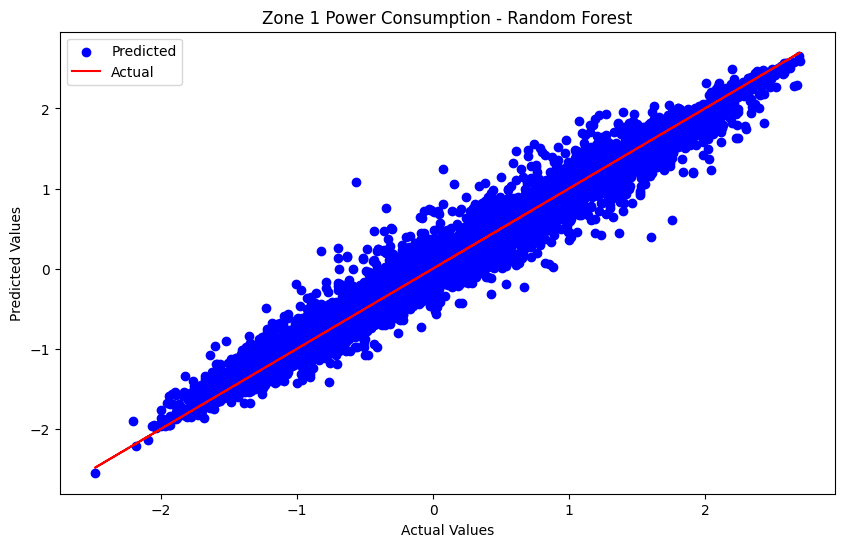

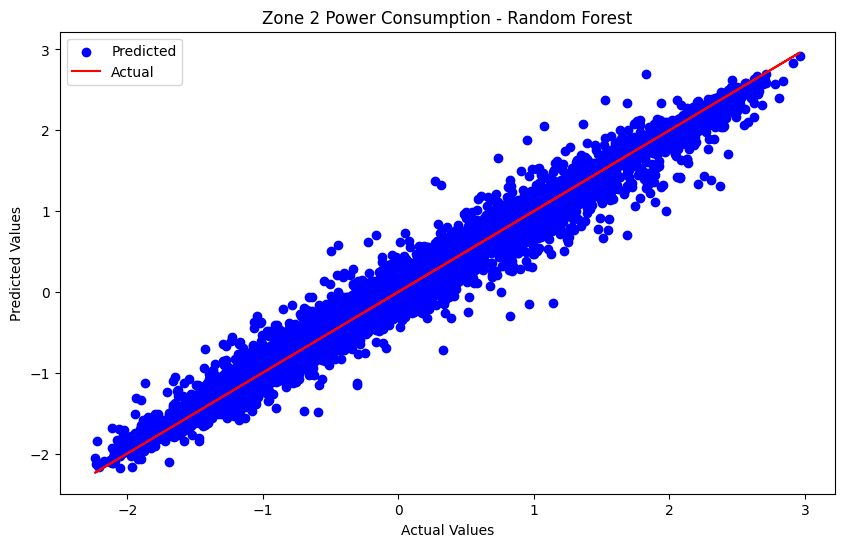

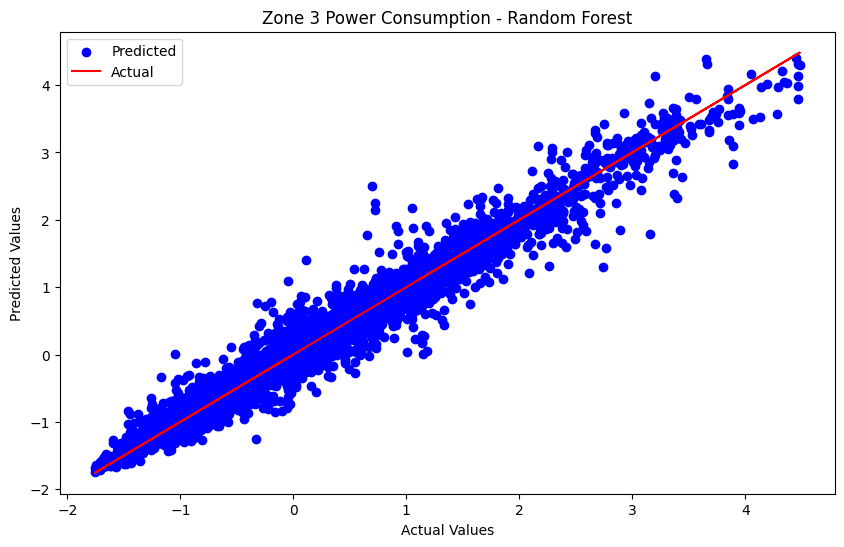

In [98]:
# Plot Random Forest Models for Zone 1
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_pred_rf_zone1, color='blue', label='Predicted')
plt.plot(y_test1, y_test1, color='red', label='Actual')
plt.title('Zone 1 Power Consumption - Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plot Random Forest Models for Zone 2
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred_rf_zone2, color='blue', label='Predicted')
plt.plot(y_test2, y_test2, color='red', label='Actual')
plt.title('Zone 2 Power Consumption - Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plot Random Forest Models for Zone 3
plt.figure(figsize=(10, 6))
plt.scatter(y_test3, y_pred_rf_zone3, color='blue', label='Predicted')
plt.plot(y_test3, y_test3, color='red', label='Actual')
plt.title('Zone 3 Power Consumption - Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Naive bayes

## Building the model: Naive bayes
how to build naive bayes with continuous features?
 There are two ways to handle the situation: <br>
 1 - Using binning<br>
 2 - Learning the PDF of each feature in the data set.
 <br> but our dataset is continuous features and targets.
<br><br>
 From the observation of the histograms plotted previously, we can say that we can not extract the PDF easily nor identify their distribution, therefore, binning will be taken into consideration.<br>
 Since the original task of this data is regression, and since the naive bayes is not the perfect model for the task in hand, so we can bin the data using clutering algorithms then use the labels for classification task.

## Zone1



### Clustering the data using K-means.

In [99]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()

X = df[['Temperature', 'Wind Speed', 'diffuse flows', 'DayOfWeek', 'Hour', 'IsWeekend', 'Month','Zone 1 Power Consumption']]
y = pd.DataFrame(df["Zone 1 Power Consumption"])


X= scaler.fit_transform(X)
X = pd.DataFrame(X,columns = df[['Temperature', 'Wind Speed', 'diffuse flows', 'DayOfWeek', 'Hour', 'IsWeekend', 'Month','Zone 1 Power Consumption']].columns)

y = scaler.fit_transform(y)
y= pd.DataFrame(y,columns=["Zone 1 Power Consumption"])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

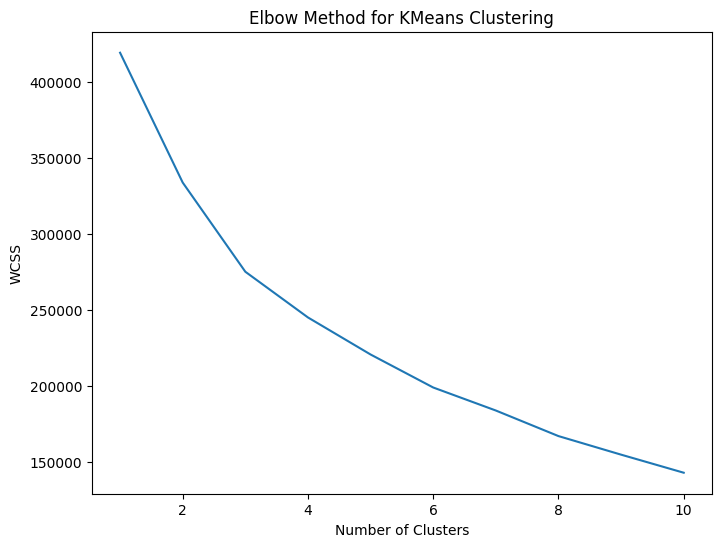

In [100]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


# Function to calculate WCSS (Within-Cluster Sum of Squares) for different k values
def calculate_wcss(data, k):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(data)
  return kmeans.inertia_

wcss_list = []
for k in range(1, 11):
  wcss = calculate_wcss(X, k)
  wcss_list.append(wcss)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_list)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for KMeans Clustering')
plt.show()

Clearly the elbow is at k=3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


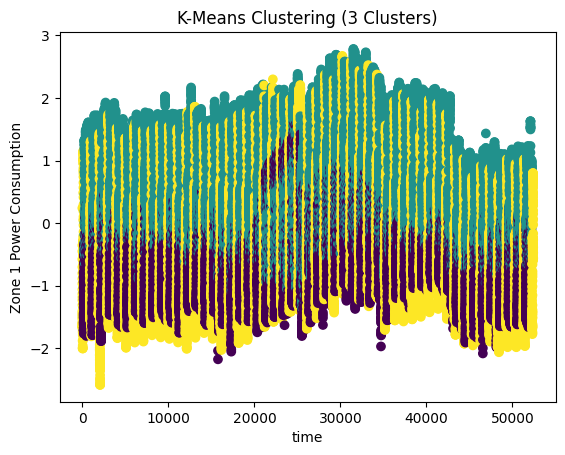

Silhouette Score: 0.2538748578130205


In [101]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

cluster_labels = kmeans.predict(X)

X['cluster'] = cluster_labels


plt.scatter(X.index, X['Zone 1 Power Consumption'], c=cluster_labels)
plt.xlabel('time')
plt.ylabel('Zone 1 Power Consumption')
plt.title('K-Means Clustering (3 Clusters)')
plt.show()

silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)


<ipython-input-102-3e48ea36bea8>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


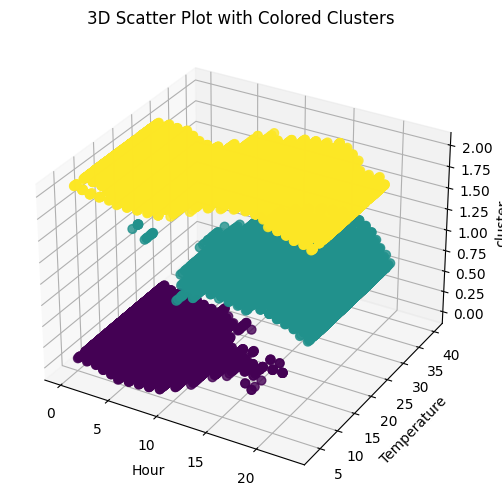

In [102]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = df['Hour']
y = df['Temperature']
z = X['cluster']

cmap = plt.cm.get_cmap('viridis')

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on cluster label
ax.scatter(x, y, z, c=z, cmap=cmap, s=40, alpha=0.8)

# Add labels and title
ax.set_xlabel('Hour')
ax.set_ylabel('Temperature')
ax.set_zlabel('cluster')
ax.set_title('3D Scatter Plot with Colored Clusters')


# Show the plot
plt.show()


<ipython-input-103-97451c516644>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


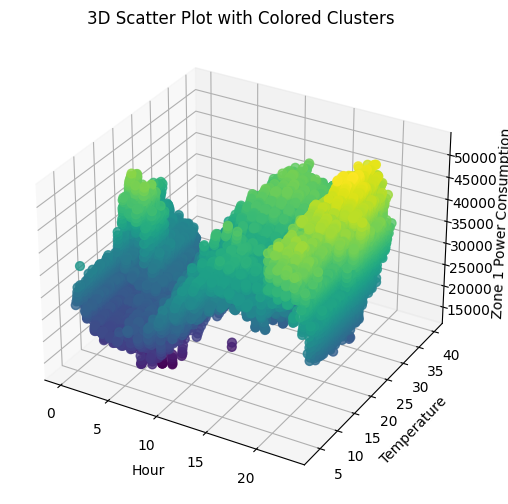

In [103]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = df['Hour']
y = df['Temperature']
z = df['Zone 1 Power Consumption']

cmap = plt.cm.get_cmap('viridis')

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on cluster label
ax.scatter(x, y, z, c=z, cmap=cmap, s=40, alpha=0.8)

# Add labels and title
ax.set_xlabel('Hour')
ax.set_ylabel('Temperature')
ax.set_zlabel('Zone 1 Power Consumption')
ax.set_title('3D Scatter Plot with Colored Clusters')


# Show the plot
plt.show()


In [104]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

y = X["cluster"]
X = X.drop(['cluster'], axis=1)


# here we split data into 10 folds
cv = TimeSeriesSplit(n_splits=10)

accuracy_scores = []
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = GaussianNB()
    model.fit(X_train, y_train)

  # Make predictions on the test set
    y_pred = model.predict(X_test)

  # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(accuracy)

# Average the accuracy across all folds
average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy (Time Series CV): {average_accuracy:.2f}")


0.9647429171038825
0.9706190975865687
0.9691500524658971
0.9307450157397692
0.9676810073452256
0.9966421825813221
0.9945435466946485
0.9966421825813221
0.985099685204617
0.9563483735571878
Average Accuracy (Time Series CV): 0.97


### Bayesian Ridge

In [105]:
import numpy as np
import pandas as pd
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

size = int(len(X) * 0.8)

X_zone1_train = pd.DataFrame(scaler.fit_transform(X[:size]))
y_zone1_train = scaler.fit_transform(pd.DataFrame(y[:size]))

X_zone1_test = pd.DataFrame(scaler.fit_transform(X[size:]))
y_zone1_test = scaler.fit_transform(pd.DataFrame(y[size:]))

model = BayesianRidge()
model.fit(X_zone1_train, y_zone1_train)

y_pred = model.predict(X_zone1_test)
y_pred_train = model.predict(X_zone1_train)

mse = mean_squared_error(y_zone1_test, y_pred)
r2 = r2_score(y_zone1_test, y_pred)
mae = mean_absolute_error(y_zone1_test, y_pred)

train_mse = mean_squared_error(y_zone1_train, y_pred_train)
train_mae = mean_absolute_error(y_zone1_train, y_pred_train)
train_r2 = r2_score(y_zone1_train, y_pred_train)

print(f'Mean Squared Error in test: {mse} vs Mean Squared Error in train : {train_mse}')
print(f'Mean Absolute Error in test: {mae} vs Mean Absolute Error in train: {train_mae}')
print(f'R-squared in test: {r2} vs R-squared in train : {train_r2} ')

Mean Squared Error in test: 0.12753916177756588 vs Mean Squared Error in train : 0.11945762678340835
Mean Absolute Error in test: 0.2959739394694303 vs Mean Absolute Error in train: 0.296595390661537
R-squared in test: 0.8724608382224341 vs R-squared in train : 0.8805423732165917 


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
y_zone1_train = y_zone1_train.reshape(-1)
y_zone1_test = y_zone1_test.reshape(-1)

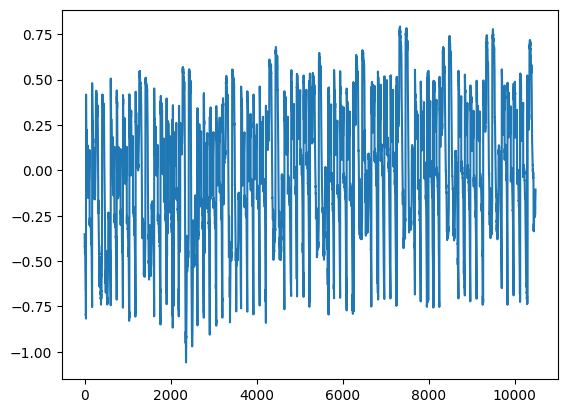

In [107]:
import numpy as np

residuals_train = np.subtract(y_zone1_train, y_pred_train)
residuals = np.subtract(y_zone1_test, y_pred)
plt.plot(residuals)

### Hybrid model : Bayesian Ridge + ANN

In [108]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a simple ANN model
def create_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(32, input_shape=(input_dim,), activation='sigmoid'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mae')
    return model



# Train the ANN model on the residuals
ann_model = create_ann_model(X_zone1_train.shape[1])

# Train the model
ann_model.fit(X_zone1_train, residuals_train, epochs=30, batch_size=32, verbose=1)

# Predict residuals using the ANN model
residuals_pred = ann_model.predict(X_zone1_test)

# Combine the predictions from Bayesian Ridge and ANN
final_predictions = y_pred + residuals_pred.flatten()

# Evaluate the combined model
mse = mean_squared_error(y_zone1_test, final_predictions)
r2 = r2_score(y_zone1_test, final_predictions)
mae = mean_absolute_error(y_zone1_test, final_predictions)

print(f'Combined Model Mean Absolute Error: {mae}')
print(f'Combined Model Mean Squared Error: {mse}')
print(f'Combined Model R-squared: {r2}')


Epoch 1/30
1311/1311 [==============================] - 4s 2ms/step - loss: 0.2506
Epoch 2/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.0895
Epoch 3/30
1311/1311 [==============================] - 5s 3ms/step - loss: 0.0676
Epoch 4/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.0570
Epoch 5/30
1311/1311 [==============================] - 2s 2ms/step - loss: 0.0499
Epoch 6/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.0456
Epoch 7/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.0425
Epoch 8/30
1311/1311 [==============================] - 4s 3ms/step - loss: 0.0407
Epoch 9/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.0385
Epoch 10/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.0367
Epoch 11/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.0351
Epoch 12/30
1311/1311 [==============================] - 5s 4ms/step - loss: 0.0329
E

## Zone2

### Clustering the data using K-means.

In [109]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()

X = df[['Temperature', 'diffuse flows', 'Hour', 'DayOfMonth', 'IsWeekend','Quarter', 'Season']]
y = y2_scaled


X= scaler.fit_transform(pd.DataFrame(X))
X = pd.DataFrame(X,columns = df[['Temperature', 'diffuse flows', 'Hour', 'DayOfMonth', 'IsWeekend','Quarter', 'Season']].columns)

y = scaler.fit_transform(pd.DataFrame(y))
y= pd.DataFrame(y,columns=["Zone 2  Power Consumption"])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

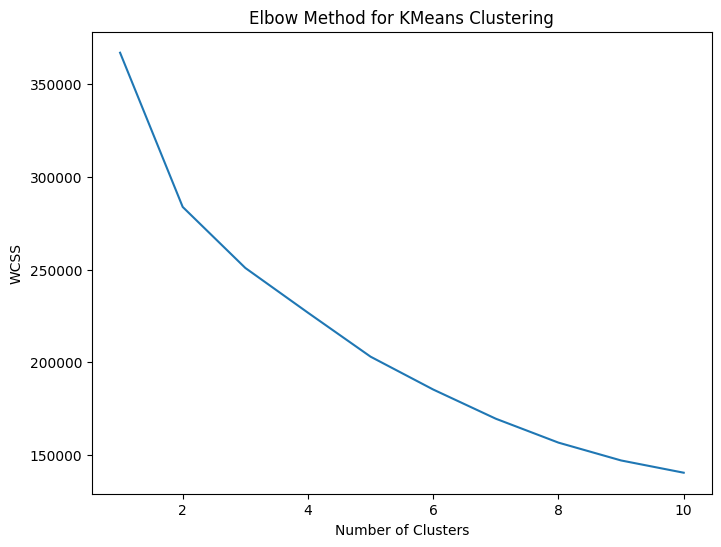

In [110]:
wcss_list = []
for k in range(1, 11):
  wcss = calculate_wcss(X, k)
  wcss_list.append(wcss)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_list)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for KMeans Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


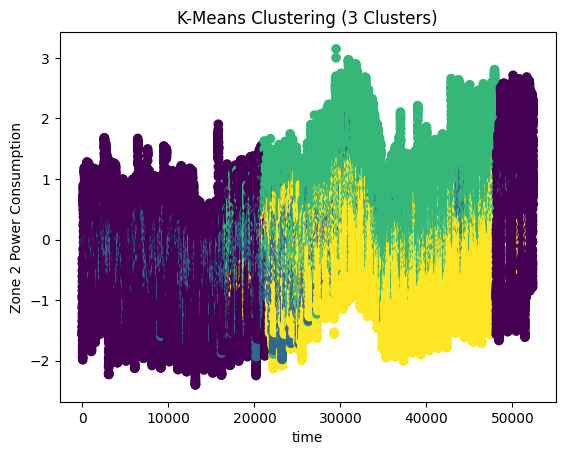

Silhouette Score: 0.2566263465342647


In [111]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import silhouette_score


kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

cluster_labels = kmeans.predict(X)

X['cluster'] = cluster_labels


plt.scatter(X.index, y, c=cluster_labels)
plt.xlabel('time')
plt.ylabel('Zone 2 Power Consumption')
plt.title('K-Means Clustering (3 Clusters)')
plt.show()

silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

<ipython-input-112-6d18795c6a8e>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


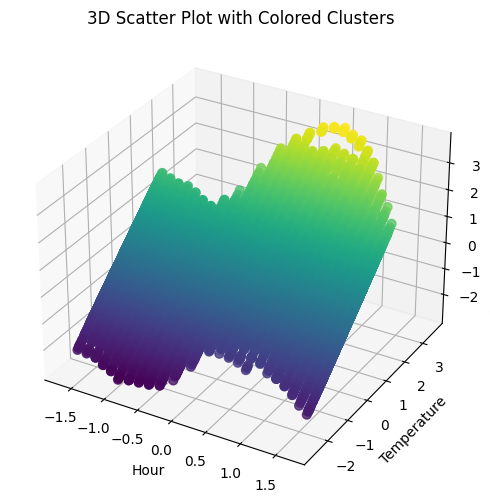

In [112]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = X['Hour']
y = X['Temperature']
z = y

cmap = plt.cm.get_cmap('viridis')

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on cluster label
ax.scatter(x, y, z, c=z, cmap=cmap, s=40, alpha=0.8)

# Add labels and title
ax.set_xlabel('Hour')
ax.set_ylabel('Temperature')
ax.set_zlabel('Zone 2 Power Consumption')
ax.set_title('3D Scatter Plot with Colored Clusters')


# Show the plot
plt.show()


<ipython-input-113-402d3afb1f19>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


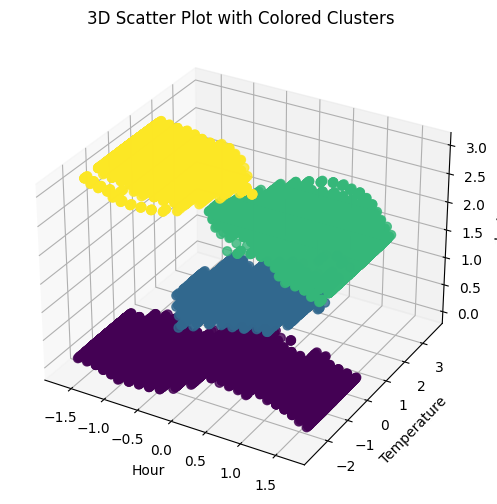

In [113]:
x = X['Hour']
y = X['Temperature']
z = X['cluster']

cmap = plt.cm.get_cmap('viridis')

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on cluster label
ax.scatter(x, y, z, c=z, cmap=cmap, s=40, alpha=0.8)

# Add labels and title
ax.set_xlabel('Hour')
ax.set_ylabel('Temperature')
ax.set_zlabel('cluster')
ax.set_title('3D Scatter Plot with Colored Clusters')


# Show the plot
plt.show()

In [114]:
y = X["cluster"]
X = X.drop(['cluster'], axis=1)

# here we apply the time cross validation:
cv = TimeSeriesSplit(n_splits=10)

accuracy_scores = []
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = GaussianNB()
    model.fit(X_train, pd.DataFrame(y_train))

  # Make predictions on the test set
    y_pred = model.predict(X_test)

  # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(accuracy)

# Average the accuracy across all folds
average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy (Time Series CV): {average_accuracy:.2f}")

0.9666316894018888
0.938719832109129
0.878488982161595
0.3853095487932844
0.47114375655823715
0.9693599160545645
0.7057712486883526
0.9525708289611753
0.9252885624344176
0.11143756558237146
Average Accuracy (Time Series CV): 0.73


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

### Bayesian Ridge

In [115]:
size = int(len(X) * 0.8)

X_zone2_train = scaler.fit_transform(X[:size])
y_zone2_train = scaler.fit_transform(pd.DataFrame(y[:size]))
X_zone2_test = scaler.fit_transform(X[size:])
y_zone2_test = scaler.fit_transform(pd.DataFrame(y[size:]))

model = BayesianRidge()
model.fit(X_zone2_train, y_zone2_train)

y_pred = model.predict(X_zone2_test)
y_pred_train = model.predict(X_zone2_train)

mse = mean_squared_error(y_zone2_test, y_pred)
r2 = r2_score(y_zone2_test, y_pred)
mae = mean_absolute_error(y_zone2_test, y_pred)

train_mse = mean_squared_error(y_zone2_train, y_pred_train)
train_mae = mean_absolute_error(y_zone2_train, y_pred_train)
train_r2 = r2_score(y_zone2_train, y_pred_train)

print(f'Mean Squared Error in test: {mse} vs Mean Squared Error in train : {train_mse}')
print(f'Mean Absolute Error in test: {mae} vs Mean Absolute Error in train: {train_mae}')
print(f'R-squared in test: {r2} vs R-squared in train : {train_r2} ')

Mean Squared Error in test: 0.24526147414350521 vs Mean Squared Error in train : 0.28075812924089355
Mean Absolute Error in test: 0.4092695634285683 vs Mean Absolute Error in train: 0.434379661541523
R-squared in test: 0.7547385258564948 vs R-squared in train : 0.7192418707591065 


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


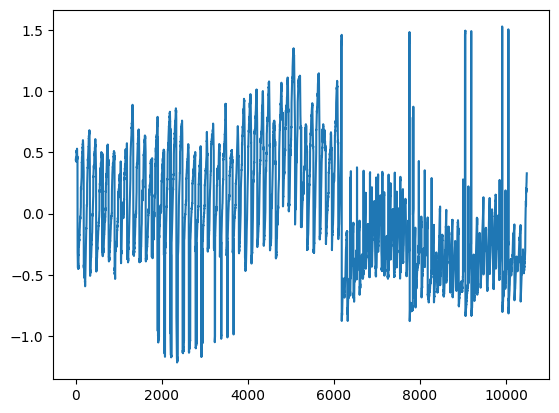

In [116]:
y_zone2_train = y_zone2_train.reshape(-1)
y_zone2_test = y_zone2_test.reshape(-1)

residuals_train = np.subtract(y_zone2_train, y_pred_train)
residuals = np.subtract(y_zone2_test, y_pred)
plt.plot(residuals)

### Hybrid model : Bayesian Ridge + ANN

In [117]:
def create_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(32, input_shape=(input_dim,), activation='sigmoid'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mae')
    return model

# Train the ANN model on the residuals
ann_model = create_ann_model(X_zone2_train.shape[1])

# Train the model
ann_model.fit(X_zone2_train, residuals_train, epochs=30, batch_size=32, verbose=1)

# Predict residuals using the ANN model
residuals_pred = ann_model.predict(X_zone2_test)

# Combine the predictions from Bayesian Ridge and ANN
final_predictions = y_pred + residuals_pred.flatten()

# Evaluate the combined model
mse = mean_squared_error(y_zone2_test, final_predictions)
r2 = r2_score(y_zone2_test, final_predictions)
mae = mean_absolute_error(y_zone2_test, final_predictions)

print(f'Combined Model Mean Absolute Error: {mae}')
print(f'Combined Model Mean Squared Error: {mse}')
print(f'Combined Model R-squared: {r2}')


Epoch 1/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.4358
Epoch 2/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.3129
Epoch 3/30
1311/1311 [==============================] - 4s 3ms/step - loss: 0.1610
Epoch 4/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.1285
Epoch 5/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.1131
Epoch 6/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.1026
Epoch 7/30
1311/1311 [==============================] - 4s 3ms/step - loss: 0.0954
Epoch 8/30
1311/1311 [==============================] - 4s 3ms/step - loss: 0.0910
Epoch 9/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.0875
Epoch 10/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.0836
Epoch 11/30
1311/1311 [==============================] - 4s 3ms/step - loss: 0.0807
Epoch 12/30
1311/1311 [==============================] - 4s 3ms/step - loss: 0.0781
E

## Zone3

### Clustering the data using K-means.

In [118]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()

X = df[['Temperature', 'Wind Speed', 'general diffuse flows', 'diffuse flows','Hour', 'Month', 'Season','Zone 3  Power Consumption']]
y = y3_scaled


X= scaler.fit_transform(pd.DataFrame(X))
X = pd.DataFrame(X,columns = df[['Temperature', 'Wind Speed', 'general diffuse flows', 'diffuse flows','Hour', 'Month', 'Season','Zone 3  Power Consumption']].columns)

y = scaler.fit_transform(pd.DataFrame(y))
y= pd.DataFrame(y,columns=["Zone 3  Power Consumption"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

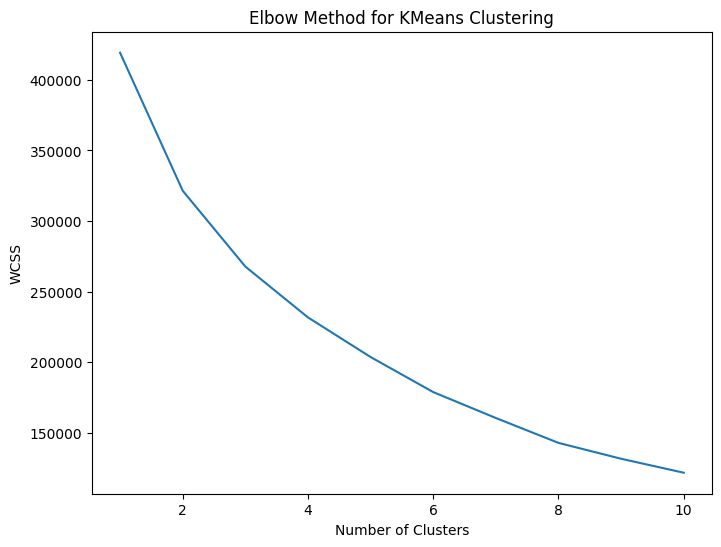

In [119]:
wcss_list = []
for k in range(1, 11):
  wcss = calculate_wcss(X, k)
  wcss_list.append(wcss)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_list)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for KMeans Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


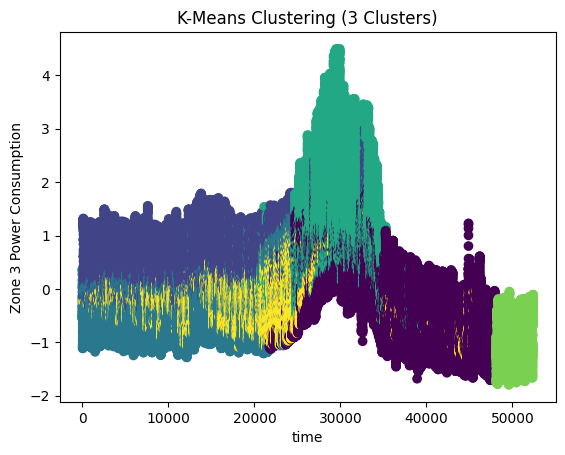

Silhouette Score: 0.38539837226861134


In [120]:
kmeans = KMeans(n_clusters=6, random_state=0)

kmeans.fit(X)

cluster_labels = kmeans.predict(X)

X['cluster'] = cluster_labels


plt.scatter(X.index, y, c=cluster_labels)
plt.xlabel('time')
plt.ylabel('Zone 3 Power Consumption')
plt.title('K-Means Clustering (3 Clusters)')
plt.show()

silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

<ipython-input-121-8e85610d910b>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


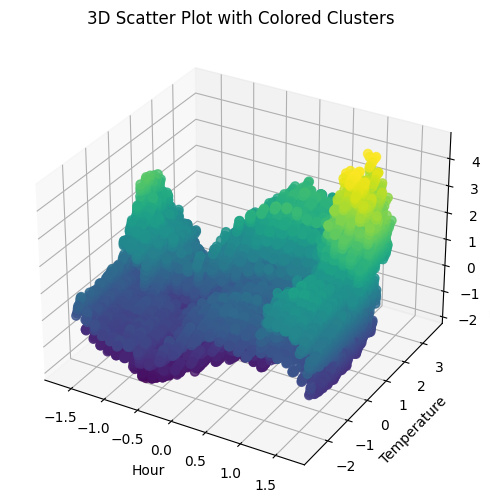

In [121]:
x = X['Hour']
y = X['Temperature']
z = X['Zone 3  Power Consumption']

cmap = plt.cm.get_cmap('viridis')

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on cluster label
ax.scatter(x, y, z, c=z, cmap=cmap, s=40, alpha=0.8)

# Add labels and title
ax.set_xlabel('Hour')
ax.set_ylabel('Temperature')
ax.set_zlabel('Zone 3 Power Consumption')
ax.set_title('3D Scatter Plot with Colored Clusters')


# Show the plot
plt.show()


<ipython-input-122-402d3afb1f19>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


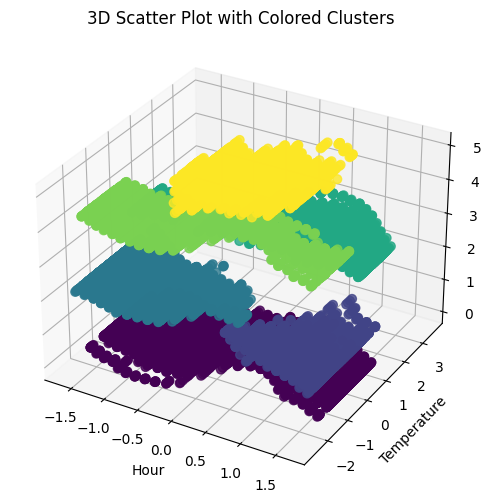

In [122]:
x = X['Hour']
y = X['Temperature']
z = X['cluster']

cmap = plt.cm.get_cmap('viridis')

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on cluster label
ax.scatter(x, y, z, c=z, cmap=cmap, s=40, alpha=0.8)

# Add labels and title
ax.set_xlabel('Hour')
ax.set_ylabel('Temperature')
ax.set_zlabel('cluster')
ax.set_title('3D Scatter Plot with Colored Clusters')


# Show the plot
plt.show()


In [123]:
y = X["cluster"]
X = X.drop(["cluster"],axis=1)

cv = TimeSeriesSplit(n_splits=10)
accuracy_scores = []
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = GaussianNB()
    model.fit(X_train, y_train)

  # Make predictions on the test set
    y_pred = model.predict(X_test)

  # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(accuracy)

# Average the accuracy across all folds
average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy (Time Series CV): {average_accuracy:.2f}")

0.8986358866736621
0.8881427072402938
0.9666316894018888
0.8214060860440714
0.25750262329485835
0.8467995802728226
0.3777544596012592
0.9825813221406086
0.9960125918153201
0.09380902413431269
Average Accuracy (Time Series CV): 0.71


### Bayesian *Ridge*

In [124]:
size = int(len(y) * 0.8)

X_zone3_train = scaler.fit_transform(X.drop(['Zone 3  Power Consumption'],axis=1)[:size])
y_zone3_train = scaler.fit_transform(pd.DataFrame(X["Zone 3  Power Consumption"][:size]))
X_zone3_test = scaler.fit_transform(X.drop(["Zone 3  Power Consumption"],axis=1)[size:])
y_zone3_test = scaler.fit_transform(pd.DataFrame(X["Zone 3  Power Consumption"][size:]))

model = BayesianRidge()
model.fit(X_zone3_train, y_zone3_train)

y_pred = model.predict(X_zone3_test)
y_pred_train = model.predict(X_zone3_train)

mse = mean_squared_error(y_zone3_test, y_pred)
r2 = r2_score(y_zone3_test, y_pred)
mae = mean_absolute_error(y_zone3_test, y_pred)

train_mse = mean_squared_error(y_zone3_train, y_pred_train)
train_mae = mean_absolute_error(y_zone3_train, y_pred_train)
train_r2 = r2_score(y_zone3_train, y_pred_train)

print(f'Mean Squared Error in test: {mse} vs Mean Squared Error in train : {train_mse}')
print(f'Mean Absolute Error in test: {mae} vs Mean Absolute Error in train: {train_mae}')
print(f'R-squared in test: {r2} vs R-squared in train : {train_r2} ')

Mean Squared Error in test: 0.8276166516864568 vs Mean Squared Error in train : 0.43203903409603117
Mean Absolute Error in test: 0.7545405955657938 vs Mean Absolute Error in train: 0.5194640266516717
R-squared in test: 0.17238334831354318 vs R-squared in train : 0.5679609659039689 


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


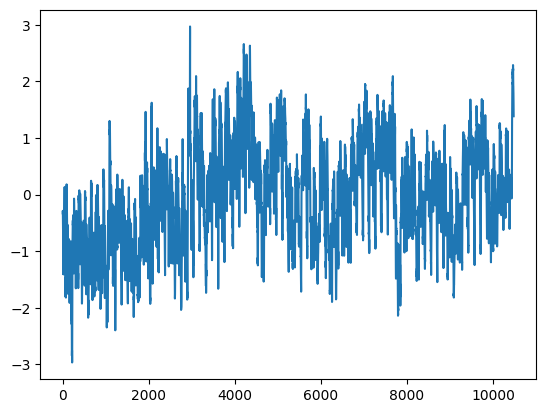

In [125]:
y_zone3_train = y_zone3_train.reshape(-1)
y_zone3_test = y_zone3_test.reshape(-1)

residuals_train = np.subtract(y_zone3_train, y_pred_train)
residuals = np.subtract(y_zone3_test, y_pred)
plt.plot(residuals)

### Hybrid model : Bayesian Ridge + ANN

In [126]:
def create_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(32, input_shape=(input_dim,), activation='sigmoid'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mae')
    return model


# Train the ANN model on the residuals
ann_model = create_ann_model(X_zone3_train.shape[1])

# Train the model
ann_model.fit(X_zone3_train, residuals_train, epochs=30, batch_size=32, verbose=1)

# Predict residuals using the ANN model
residuals_pred = ann_model.predict(X_zone3_test)

# Combine the predictions from Bayesian Ridge and ANN
final_predictions = y_pred + residuals_pred.flatten()

# Evaluate the combined model
mse = mean_squared_error(y_zone3_test, final_predictions)
r2 = r2_score(y_zone3_test, final_predictions)
mae = mean_absolute_error(y_zone3_test, final_predictions)

print(f'Combined Model Mean Absolute Error: {mae}')
print(f'Combined Model Mean Squared Error: {mse}')
print(f'Combined Model R-squared: {r2}')


Epoch 1/30
1311/1311 [==============================] - 4s 2ms/step - loss: 0.4541
Epoch 2/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.3531
Epoch 3/30
1311/1311 [==============================] - 4s 3ms/step - loss: 0.3102
Epoch 4/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.2876
Epoch 5/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.2750
Epoch 6/30
1311/1311 [==============================] - 4s 3ms/step - loss: 0.2651
Epoch 7/30
1311/1311 [==============================] - 5s 4ms/step - loss: 0.2571
Epoch 8/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.2493
Epoch 9/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.2419
Epoch 10/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.2340
Epoch 11/30
1311/1311 [==============================] - 3s 2ms/step - loss: 0.2281
Epoch 12/30
1311/1311 [==============================] - 4s 3ms/step - loss: 0.2233
E

# SVM

SVM aim to find the optimal hyperplane that best separates the two classes in the input data. A hyperplane is a flat subspace of dimension p-1 in a p-dimensional space, where p is the number of input features. The optimal hyperplane is the one that maximizes the margin, which is the distance between the hyperplane and the closest data points from each class, known as support vectors.

Similar to SVMs, SVR uses the concept of a hyperplane and margin but there are differences in their definitions. In SVR, the margin is defined as the error tolerance of the model, which is also called as the ε-insensitive tube. This tube allows some deviation of the data points from the hyperplane without being counted as errors. The hyperplane is the best fit possible to the data that fall within the 𝜖-insensitive tube.
###   Model Building : SVR

### Linear kernel

In [127]:
svm_model_linear1 = SVR(kernel='linear', C=1.0, epsilon=0.1)
svm_model_linear1.fit(X_train1_selected, y_train1)

SVR(kernel='linear')

In [128]:
svm_model_linear2 = SVR(kernel='linear', C=1.0, epsilon=0.1)
svm_model_linear2.fit(X_train2_selected, y_train2)

SVR(kernel='linear')

In [129]:
svm_model_linear3 = SVR(kernel='linear', C=1.0, epsilon=0.1)
svm_model_linear3.fit(X_train3_selected, y_train3)

SVR(kernel='linear')

In [ ]:
y_pred_linear1 = svm_model_linear1.predict(X_test1_selected)

In [131]:
y_pred_linear2 = svm_model_linear2.predict(X_test2_selected)

In [ ]:
y_pred_linear3 = svm_model_linear3.predict(X_test3_selected)

In [133]:
mse_linear1 = mean_squared_error(y_test1, y_pred_linear1)
mae_linear1 = mean_absolute_error(y_test1, y_pred_linear1)
r2_linear1 = r2_score(y_test1, y_pred_linear1)

print("EVALUATION METRICS ZONE 1 :")
print("Mean Squared Error:", mse_linear1)
print("Mean Absolute Error:", mae_linear1)
print("R-squared:", r2_linear1)

EVALUATION METRICS ZONE 1 :
Mean Squared Error: 0.35400891098045495
Mean Absolute Error: 0.4678689925170192
R-squared: 0.6435403315133411


In [ ]:
# Calculate training metrics for Zone 1
y_pred_linear1_train = svm_model_linear1.predict(X_train1_selected)

mse_linear1_train = mean_squared_error(y_train1, y_pred_linear1_train)
mae_linear1_train = mean_absolute_error(y_train1, y_pred_linear1_train)
r2_linear1_train = r2_score(y_train1, y_pred_linear1_train)
print("Training Metrics for Zone 1:")
print("Training MSE:", mse_linear1_train)
print("Training MAE:", mae_linear1_train)
print("Training R-squared:", r2_linear1_train)
print()

In [135]:
mse_linear2 = mean_squared_error(y_test2, y_pred_linear2)
mae_linear2 = mean_absolute_error(y_test2, y_pred_linear2)
r2_linear2 = r2_score(y_test2, y_pred_linear2)

print("EVALUATION METRICS ZONE 2 :")
print("Mean Squared Error:", mse_linear2)
print("Mean Absolute Error:", mae_linear2)
print("R-squared:", r2_linear2)

EVALUATION METRICS ZONE 2 :
Mean Squared Error: 0.3865004294322155
Mean Absolute Error: 0.48675428608858423
R-squared: 0.6125673243567187


In [ ]:
# Calculate training metrics for Zone 2
y_pred_linear2_train = svm_model_linear2.predict(X_train2_selected)

mse_linear2_train = mean_squared_error(y_train2, y_pred_linear2_train)
mae_linear2_train = mean_absolute_error(y_train2, y_pred_linear2_train)
r2_linear2_train = r2_score(y_train2, y_pred_linear2_train)
print("Training Metrics for Zone 2:")
print("Training MSE:", mse_linear2_train)
print("Training MAE:", mae_linear2_train)
print("Training R-squared:", r2_linear2_train)
print()

In [ ]:
mse_linear3 = mean_squared_error(y_test3, y_pred_linear3)
mae_linear3 = mean_absolute_error(y_test3, y_pred_linear3)
r2_linear3 = r2_score(y_test3, y_pred_linear3)

print("EVALUATION METRICS ZONE 3 :")
print("Mean Squared Error:", mse_linear3)
print("Mean Absolute Error:", mae_linear3)
print("R-squared:", r2_linear3)

In [ ]:
# Calculate training metrics for Zone 3
y_pred_linear3_train = svm_model_linear3.predict(X_train3_selected)

mse_linear3_train = mean_squared_error(y_train3, y_pred_linear3_train)
mae_linear3_train = mean_absolute_error(y_train3, y_pred_linear3_train)
r2_linear3_train = r2_score(y_train3, y_pred_linear3_train)
print("Training Metrics for Zone 3:")
print("Training MSE:", mse_linear3_train)
print("Training MAE:", mae_linear3_train)
print("Training R-squared:", r2_linear3_train)
print()

### RBF kernel

In [ ]:
svr_rbf1 = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.01)
svr_rbf2 = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.01)
svr_rbf3 = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.01)

svr_rbf1.fit(X_train1_selected, y_train1)
svr_rbf2.fit(X_train2_selected, y_train2)
svr_rbf3.fit(X_train3_selected, y_train3)


In [ ]:
y_pred_rbf1 = svr_rbf1.predict(X_test1_selected)
y_pred_rbf2 = svr_rbf2.predict(X_test2_selected)
y_pred_rbf3 = svr_rbf3.predict(X_test3_selected)

In [ ]:
y_pred_train_rbf1 = svr_rbf1.predict(X_train1_selected)
y_pred_train_rbf2 = svr_rbf2.predict(X_train2_selected)
y_pred_train_rbf3 = svr_rbf3.predict(X_train3_selected)

In [ ]:
mse_rbf1 = mean_squared_error(y_test1, y_pred_rbf1)
mae_rbf1 = mean_absolute_error(y_test1, y_pred_rbf1)
r2_rbf1 = r2_score(y_test1, y_pred_rbf1)

print("EVALUATION METRICS ZONE 1 :")
print("Mean Squared Error:", mse_rbf1)
print("Mean Absolute Error:", mae_rbf1)
print("R-squared:", r2_rbf1)

In [ ]:
# Calculate MSE, MAE, and R-squared for the training set
mse_train_rbf1 = mean_squared_error(y_train1, y_pred_train_rbf1)
mae_train_rbf1 = mean_absolute_error(y_train1, y_pred_train_rbf1)
r2_train_rbf1 = r2_score(y_train1, y_pred_train_rbf1)

# Print the evaluation metrics for Zone 1 training set
print("TRAINING EVALUATION METRICS ZONE 1 (RBF Kernel):")
print("Mean Squared Error:", mse_train_rbf1)
print("Mean Absolute Error:", mae_train_rbf1)
print("R-squared:", r2_train_rbf1)

In [ ]:
mse_rbf2 = mean_squared_error(y_test2, y_pred_rbf2)
mae_rbf2 = mean_absolute_error(y_test2, y_pred_rbf2)
r2_rbf2 = r2_score(y_test2, y_pred_rbf2)

print("EVALUATION METRICS ZONE 2 :")
print("Mean Squared Error:", mse_rbf2)
print("Mean Absolute Error:", mae_rbf2)
print("R-squared:", r2_rbf2)

In [ ]:
# Calculate MSE, MAE, and R-squared for the training set
mse_train_rbf2 = mean_squared_error(y_train2, y_pred_train_rbf2)
mae_train_rbf2 = mean_absolute_error(y_train2, y_pred_train_rbf2)
r2_train_rbf2 = r2_score(y_train2, y_pred_train_rbf2)

# Print the evaluation metrics for Zone 2 training set
print("TRAINING EVALUATION METRICS ZONE 2 (RBF Kernel):")
print("Mean Squared Error:", mse_train_rbf2)
print("Mean Absolute Error:", mae_train_rbf2)
print("R-squared:", r2_train_rbf2)

In [ ]:
mse_rbf3 = mean_squared_error(y_test3, y_pred_rbf3)
mae_rbf3 = mean_absolute_error(y_test3, y_pred_rbf3)
r2_rbf3 = r2_score(y_test3, y_pred_rbf3)

print("EVALUATION METRICS ZONE 3 :")
print("Mean Squared Error:", mse_rbf3)
print("Mean Absolute Error:", mae_rbf3)
print("R-squared:", r2_rbf3)

In [ ]:
# Calculate MSE, MAE, and R-squared for the training set
mse_train_rbf3 = mean_squared_error(y_train3, y_pred_train_rbf3)
mae_train_rbf3 = mean_absolute_error(y_train3, y_pred_train_rbf3)
r2_train_rbf3 = r2_score(y_train3, y_pred_train_rbf3)

# Print the evaluation metrics for Zone 3 training set
print("TRAINING EVALUATION METRICS ZONE 3 (RBF Kernel):")
print("Mean Squared Error:", mse_train_rbf3)
print("Mean Absolute Error:", mae_train_rbf3)
print("R-squared:", r2_train_rbf3)

### Poly Kernel

In [ ]:
svr_poly = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.01, coef0=1)
svr_poly.fit(X_train1_selected, y_train1)

# Make predictions on the test set
y_pred_poly = svr_poly.predict(X_test1_selected)

# Evaluate the model
mse_poly = mean_squared_error(y_test1, y_pred_poly)
mae_poly = mean_absolute_error(y_test1, y_pred_poly)
r2_poly = r2_score(y_test1, y_pred_poly)

print("Mean Squared Error (Polynomial SVR):", mse_poly)
print("Mean Absolute Error (Polynomial SVR):", mae_poly)
print("R-squared (Polynomial SVR):", r2_poly)

# Get the R-squared score using the score method
r2_poly_score = svr_poly.score(X_test1_selected, y_test1)
print("R-squared (score method):", r2_poly_score)

In [ ]:
svr_poly2 = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.01, coef0=1)
svr_poly2.fit(X_train2_selected, y_train2)

# Make predictions on the test set
y_pred_poly2 = svr_poly2.predict(X_test2_selected)

# Evaluate the model
mse_poly2 = mean_squared_error(y_test2, y_pred_poly2)
mae_poly2 = mean_absolute_error(y_test2, y_pred_poly2)
r2_poly2 = r2_score(y_test2, y_pred_poly2)

print("Mean Squared Error (Polynomial SVR):", mse_poly2)
print("Mean Absolute Error (Polynomial SVR):", mae_poly2)
print("R-squared (Polynomial SVR):", r2_poly2)

# Get the R-squared score using the score method
r2_poly_score2 = svr_poly2.score(X_test2_selected, y_test2)
print("R-squared (score method):", r2_poly_score2)

In [ ]:
svr_poly3 = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.01, coef0=1)
svr_poly3.fit(X_train3_selected, y_train3)

# Make predictions on the test set
y_pred_poly3 = svr_poly3.predict(X_test3_selected)

# Evaluate the model
mse_poly3 = mean_squared_error(y_test3, y_pred_poly3)
mae_poly3 = mean_absolute_error(y_test3, y_pred_poly3)
r2_poly3 = r2_score(y_test3, y_pred_poly3)

print("Mean Squared Error (Polynomial SVR):", mse_poly3)
print("Mean Absolute Error (Polynomial SVR):", mae_poly3)
print("R-squared (Polynomial SVR):", r2_poly3)

# Get the R-squared score using the score method
r2_poly_score3 = svr_poly3.score(X_test3_selected, y_test3)
print("R-squared (score method):", r2_poly_score3)

# ANN

In [54]:
#imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()

X = df[['Temperature', 'Wind Speed', 'diffuse flows', 'DayOfWeek', 'Hour', 'IsWeekend', 'Month']]
y = pd.DataFrame(df["Zone 1 Power Consumption"])


X= scaler.fit_transform(X)
X = pd.DataFrame(X,columns = df[['Temperature', 'Wind Speed', 'diffuse flows', 'DayOfWeek', 'Hour', 'IsWeekend', 'Month']].columns)

y = scaler.fit_transform(y)
y= pd.DataFrame(y,columns=["Zone 1 Power Consumption"])


In [56]:
#splitting the dataset
train_size = int(len(df) * 0.8)  # 80% train, 20% test
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [59]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the model architecture
model = Sequential([
  Dense(16, activation='sigmoid', input_shape=(X_train.shape[1],)),
  Dense(16, activation='sigmoid'),
  Dropout(0.2),  # Add Dropout after the second hidden layer with 20% dropout rate in order to avoid overfitting.
  Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mae')

# Learning rate scheduler (ReduceLROnPlateau)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.001)

# Train the model with Dropout and learning rate scheduler
model.fit(X_train, y_train, epochs=30, batch_size=32,
          validation_split=0.2, callbacks=[reduce_lr])


Epoch 1/30
1049/1049 [==============================] - 9s 5ms/step - loss: 0.5953 - val_loss: 0.4554 - lr: 0.0010
Epoch 2/30
1049/1049 [==============================] - 4s 4ms/step - loss: 0.4926 - val_loss: 0.4560 - lr: 0.0010
Epoch 3/30
1049/1049 [==============================] - 4s 3ms/step - loss: 0.4719 - val_loss: 0.4562 - lr: 0.0010
Epoch 4/30
1049/1049 [==============================] - 3s 3ms/step - loss: 0.4511 - val_loss: 0.4409 - lr: 0.0010
Epoch 5/30
1049/1049 [==============================] - 3s 3ms/step - loss: 0.4368 - val_loss: 0.4549 - lr: 0.0010
Epoch 6/30
1049/1049 [==============================] - 3s 3ms/step - loss: 0.4243 - val_loss: 0.4504 - lr: 0.0010
Epoch 7/30
1049/1049 [==============================] - 4s 4ms/step - loss: 0.4130 - val_loss: 0.4506 - lr: 0.0010
Epoch 8/30
1049/1049 [==============================] - 3s 3ms/step - loss: 0.4053 - val_loss: 0.4621 - lr: 0.0010
Epoch 9/30
1049/1049 [==============================] - 3s 3ms/step - loss: 0.39

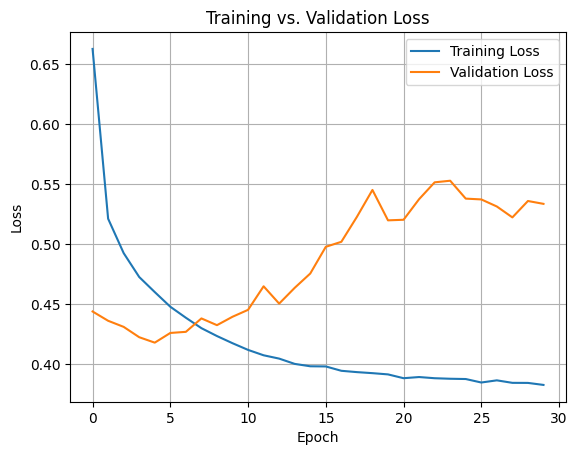

In [58]:
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
# Evaluate the model
pred = model.predict(X_test)
mse = model.evaluate(X_test, y_test)
mae_poly = mean_absolute_error(y_test, pred)
r2_poly = r2_score(y_test, pred)
print("Mean Squared Error:", mse)

328/328 [==============================] - 1s 2ms/step - loss: 1.5907
Mean Squared Error: 1.5906769037246704


# LSTM

Data Pre-Processing :

In [ ]:
# Define window size
window_size = 5

# Reshape data for LSTM with window size
def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

X_train1_lstm, y_train1_lstm = create_sequences(X_train1.values, window_size)
X_test1_lstm, y_test1_lstm = create_sequences(X_test1.values, window_size)

X_train2_lstm, y_train2_lstm = create_sequences(X_train2.values, window_size)
X_test2_lstm, y_test2_lstm = create_sequences(X_test2.values, window_size)

X_train3_lstm, y_train3_lstm = create_sequences(X_train3.values, window_size)
X_test3_lstm, y_test3_lstm = create_sequences(X_test3.values, window_size)

Model Training :

In [ ]:
# Define LSTM model architecture
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, input_shape=input_shape))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# Create and train LSTM models for each zone
model_zone1 = create_lstm_model((X_train1_lstm.shape[1], X_train1_lstm.shape[2]))
model_zone1.fit(X_train1_lstm, y_train1_lstm, epochs=50, batch_size=32, verbose=1)

model_zone2 = create_lstm_model((X_train2_lstm.shape[1], X_train2_lstm.shape[2]))
model_zone2.fit(X_train2_lstm, y_train2_lstm, epochs=50, batch_size=32, verbose=1)

model_zone3 = create_lstm_model((X_train3_lstm.shape[1], X_train3_lstm.shape[2]))
model_zone3.fit(X_train3_lstm, y_train3_lstm, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
1311/1311 [==============================] - 10s 6ms/step - loss: 0.9345
Epoch 2/50
1311/1311 [==============================] - 5s 4ms/step - loss: 0.9330
Epoch 3/50
1311/1311 [==============================] - 7s 5ms/step - loss: 0.9325
Epoch 4/50
1311/1311 [==============================] - 5s 4ms/step - loss: 0.9322
Epoch 5/50
1311/1311 [==============================] - 6s 5ms/step - loss: 0.9319
Epoch 6/50
1311/1311 [==============================] - 6s 4ms/step - loss: 0.9317
Epoch 7/50
1311/1311 [==============================] - 5s 4ms/step - loss: 0.9314
Epoch 8/50
1311/1311 [==============================] - 7s 5ms/step - loss: 0.9309
Epoch 9/50
1311/1311 [==============================] - 7s 5ms/step - loss: 0.9303
Epoch 10/50
1311/1311 [==============================] - 8s 6ms/step - loss: 0.9296
Epoch 11/50
1311/1311 [==============================] - 6s 4ms/step - loss: 0.9285
Epoch 12/50
1311/1311 [==============================] - 7s 5ms/step - loss: 0.9275


Model Prediction :

In [ ]:
# Predictions
y_pred1 = model_zone1.predict(X_test1_lstm)
y_pred2 = model_zone2.predict(X_test2_lstm)
y_pred3 = model_zone3.predict(X_test3_lstm)

328/328 [==============================] - 1s 2ms/step


Model Evaluation :

In [ ]:
# Evaluate models
loss_zone1 = model_zone1.evaluate(X_test1_lstm, y_test1_lstm, verbose=0)
print("Zone 1 Test Loss:", loss_zone1)

loss_zone2 = model_zone2.evaluate(X_test2_lstm, y_test2_lstm, verbose=0)
print("Zone 2 Test Loss:", loss_zone2)

loss_zone3 = model_zone3.evaluate(X_test3_lstm, y_test3_lstm, verbose=0)
print("Zone 3 Test Loss:", loss_zone3)

Zone 1 Test Loss: 0.995416522026062
Zone 2 Test Loss: 0.997954785823822
Zone 3 Test Loss: 0.9948188066482544


# ARIMA models

For the following section, please switch your kernel to be R kernel in order to run this code

In [ ]:
# import
install.packages('tseries')
install.packages('TSA')
library(tseries)
library(readr)
library(MASS)
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’



Attaching package: ‘TSA’


The following object is masked from ‘package:readr’:

    spec


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




In [ ]:
#Loading the dataset
data <- read_csv("/content/Tetuan City power consumption.csv",show_col_types = FALSE)
head(data)

DateTime      Temperature Humidity Wind Speed general diffuse flows
1 1/1/2017 0:00 6.559       73.8     0.083      0.051                
2 1/1/2017 0:10 6.414       74.5     0.083      0.070                
3 1/1/2017 0:20 6.313       74.5     0.080      0.062                
4 1/1/2017 0:30 6.121       75.0     0.083      0.091                
5 1/1/2017 0:40 5.921       75.7     0.081      0.048                
6 1/1/2017 0:50 5.853       76.9     0.081      0.059                
  diffuse flows Zone 1 Power Consumption Zone 2  Power Consumption
1 0.119         34055.70                 16128.88                 
2 0.085         29814.68                 19375.08                 
3 0.100         29128.10                 19006.69                 
4 0.096         28228.86                 18361.09                 
5 0.085         27335.70                 17872.34                 
6 0.108         26624.81                 17416.41                 
  Zone 3  Power Consumption
1 20240.96                 
2 20131.08                 
3 19668.43                 
4 18899.28                 
5 18442.41                 
6 18130.12

In [ ]:
# splitting the targets from other features since we re interested in analysing
data_zone1 = data[,7]
data_zone2 = data[,8]
data_zone3 = data[,9]

#creating time series objects for each target feature
data_zone1 = ts(data_zone1)
data_zone2 = ts(data_zone2)
data_zone3 = ts(data_zone3)

#splitting the data into test and train
smp_size <- floor(0.95 * length(data_zone1))

train_ind <- seq(1,smp_size)
train_zone1 <- data_zone1[train_ind]
test_zone1 <- data_zone1[-train_ind]
train_zone1 = ts(train_zone1)
test_zone1 = ts(test_zone1)


train_zone2 <- data_zone2[train_ind]
test_zone2 <- data_zone2[-train_ind]
train_zone2 = ts(train_zone2)
test_zone2 = ts(test_zone2)

train_zone3 <- data_zone3[train_ind]
test_zone3 <- data_zone3[-train_ind]
train_zone3 = ts(train_zone3)
test_zone3 = ts(test_zone3)


## Zone1

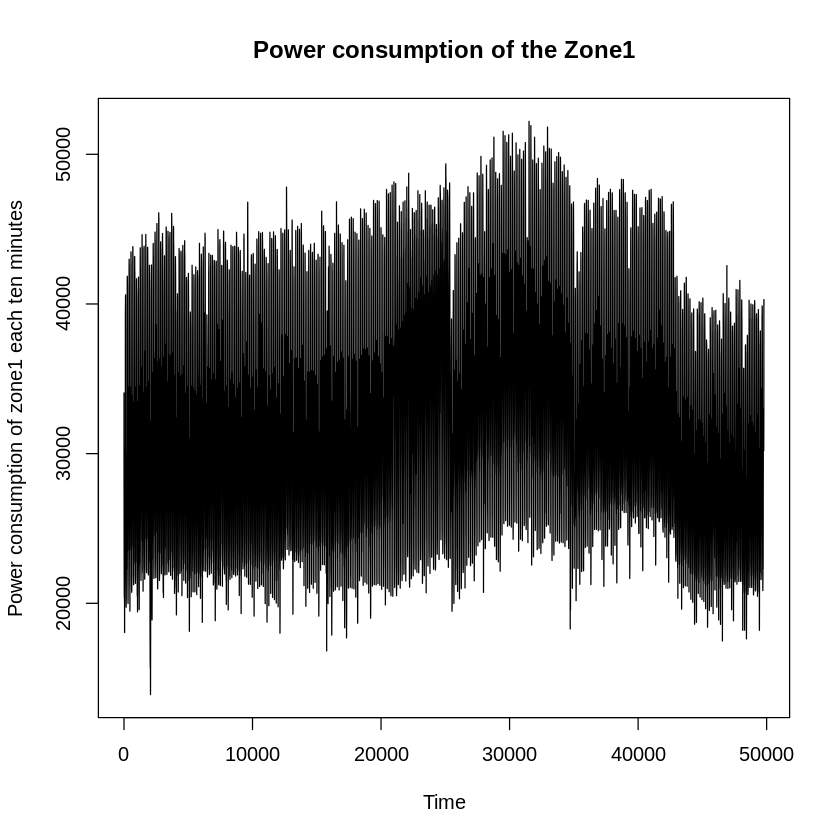

In [ ]:
plot(train_zone1,xlab='Time', ylab="Power consumption of zone1 each ten minutes" ,type='l', main="Power consumption of the Zone1")

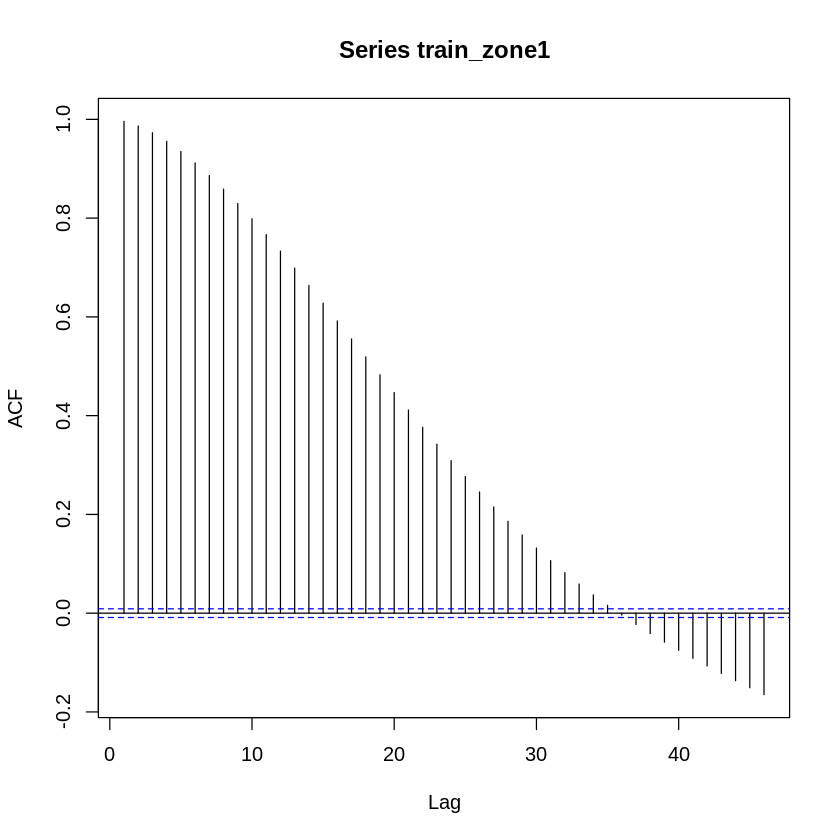

In [ ]:
# plotting the acf to assess any form of non stationarity for each zone
acf(train_zone1)

The acf plot is decaying relatively fast, which is an indicator of the unit root abscence.

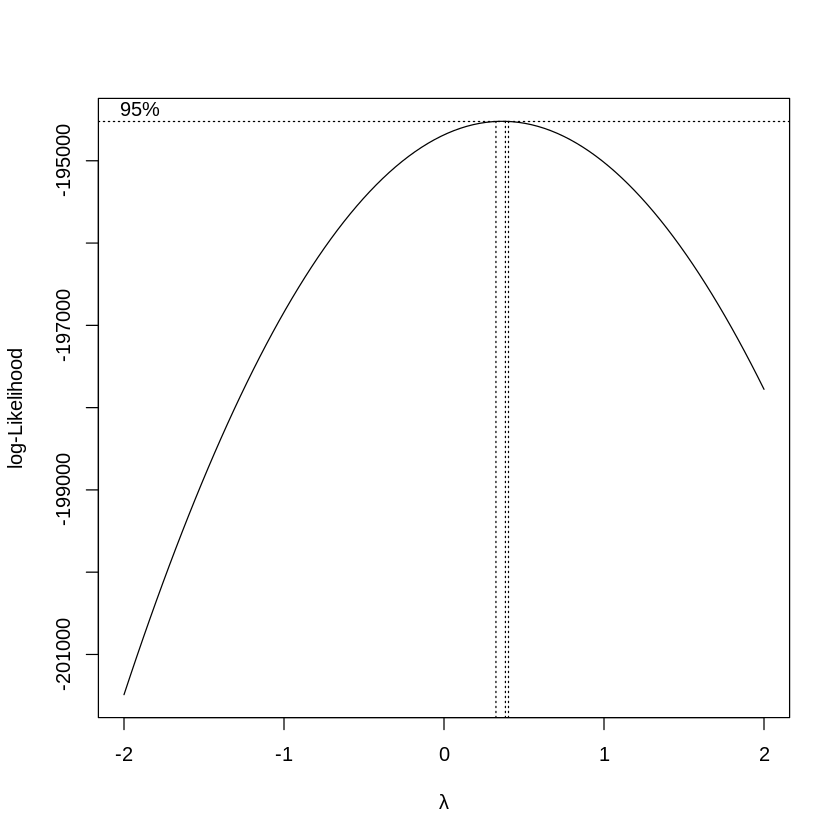

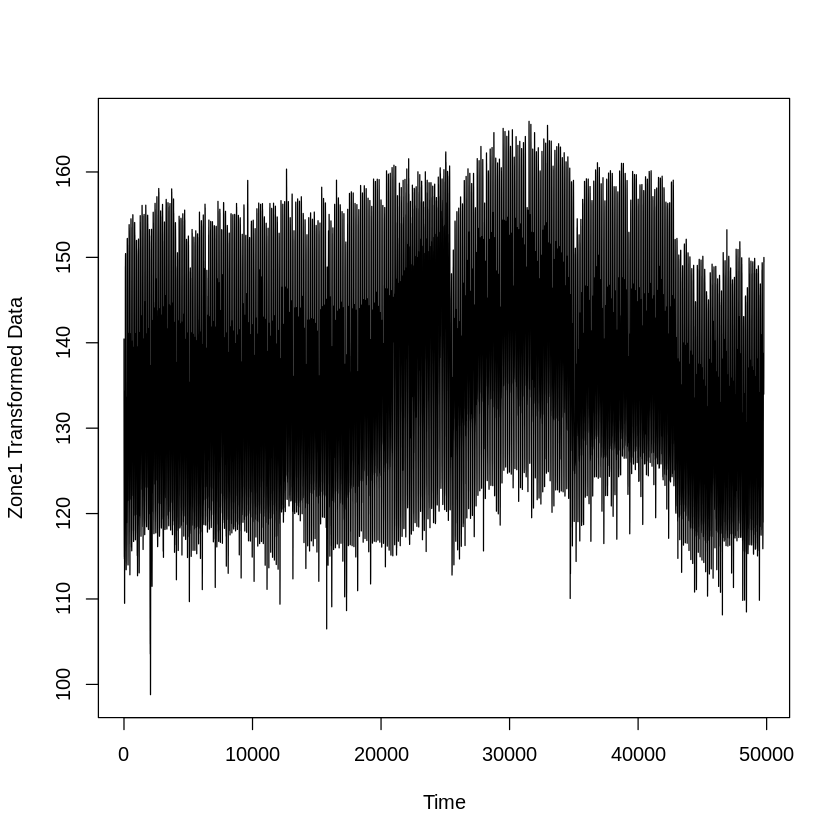

[1] 0.3838384


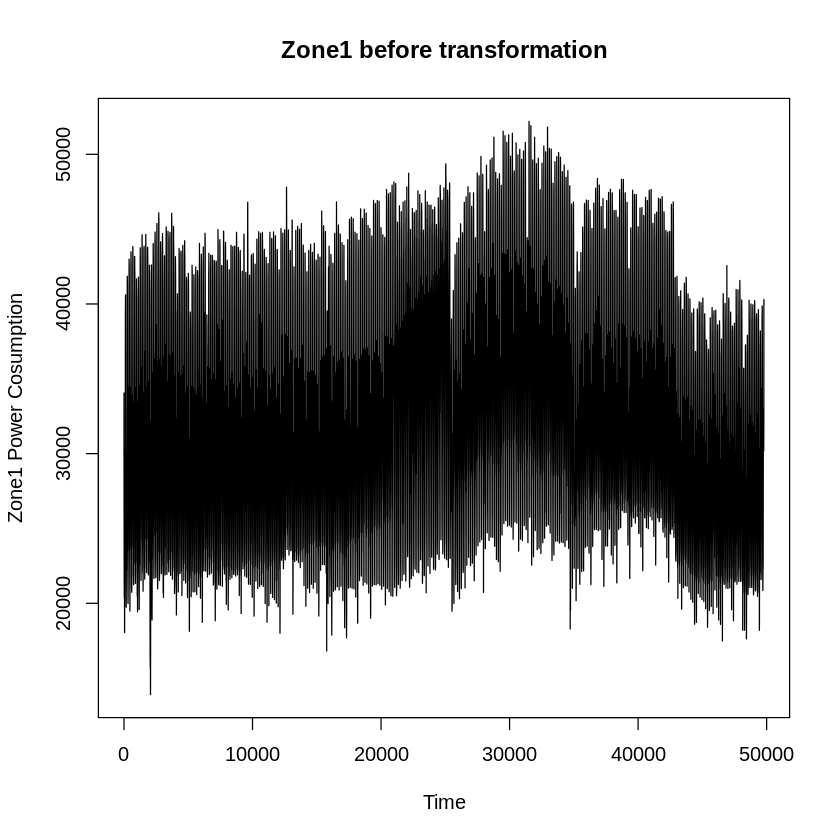

In [ ]:
# Transforming the data using the box-cox transformation for variance stabilization for zone1

# Visual inspection of Zone1 data suggests stable variance.
# However, to be more rigorous, we will apply the Box-Cox transformation.
library(MASS)
boxcox_result <- boxcox(train_zone1 ~ 1)

# Extract the optimal lambda
lambda <- boxcox_result$x[which.max(boxcox_result$y)]

# Apply the Box-Cox transformation
transformed_train_zone1 <- if (lambda == 0) {
  log(train_zone1)
} else {
  (train_zone1^lambda - 1) / lambda
}

# Plot the transformed data
#par(mfrow = c(1, 2),mar = c(0, 1, 0, 1))
plot(transformed_train_zone1, type = "l", ylab = "Zone1 Transformed Data", xlab = "Time")
plot(train_zone1 , main='Zone1 before transformation', ylab='Zone1 Power Cosumption',xlab='Time',type='l')

# Print the optimal lambda
print(lambda)

In [ ]:
# after the variance stablization (box-cox transformation), we no test for any sign of non-stationarity through the ADF test

# we first fit the data into an AR model to determine the order in orde to use for the adf test
ar<- ar(transformed_train_zone1)
ar
adf.test(transformed_train_zone1, k = ar$order)


Call:
ar(x = transformed_train_zone1)

Coefficients:
      1        2        3        4        5        6        7        8  
 1.5305  -0.5097   0.0654  -0.0514  -0.0268  -0.0076  -0.0048  -0.0116  
      9       10       11       12       13       14       15       16  
 0.0163   0.0141  -0.0215   0.0137  -0.0106  -0.0009  -0.0029  -0.0023  
     17       18       19       20       21       22       23       24  
-0.0052   0.0103  -0.0057  -0.0025  -0.0029   0.0090  -0.0147   0.0194  
     25       26       27       28       29       30       31       32  
-0.0168  -0.0057   0.0109   0.0047  -0.0137   0.0192  -0.0116   0.0032  
     33       34       35       36       37       38       39       40  
 0.0020  -0.0140   0.0060   0.0188  -0.0104   0.0011  -0.0021  -0.0012  
     41       42       43       44       45       46  
 0.0053  -0.0130   0.0268  -0.0215   0.0231  -0.0242  

Order selected 46  sigma^2 estimated as  0.5762

Warning message in adf.test(transformed_train_zone1, k = ar$order):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  transformed_train_zone1
Dickey-Fuller = -34.468, Lag order = 46, p-value = 0.01
alternative hypothesis: stationary


the p-value <<< 0.05 therefore **we reject H0**, then our **Zone1 transformed data is stationary**.
Recall the ADF test:
Recall that the ADF (Dickey and fuller) test:
H0: a=1 (non-sationarity)
H1: a < 1  (stationarity)

### Model specification

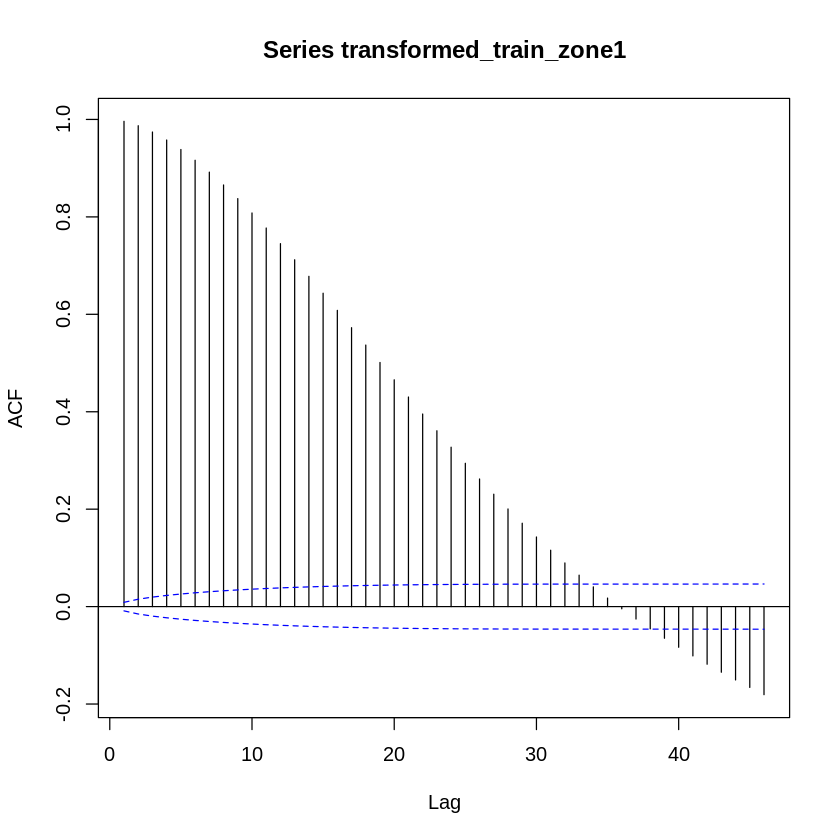

In [ ]:
# plotting the ACF function to see if the MA model is a fit or not and with which order.
acf(transformed_train_zone1, ci.type = 'ma')

The acf plot is clearly decaying/tailling off which is a sign the our model is possibly an AR(p) model.

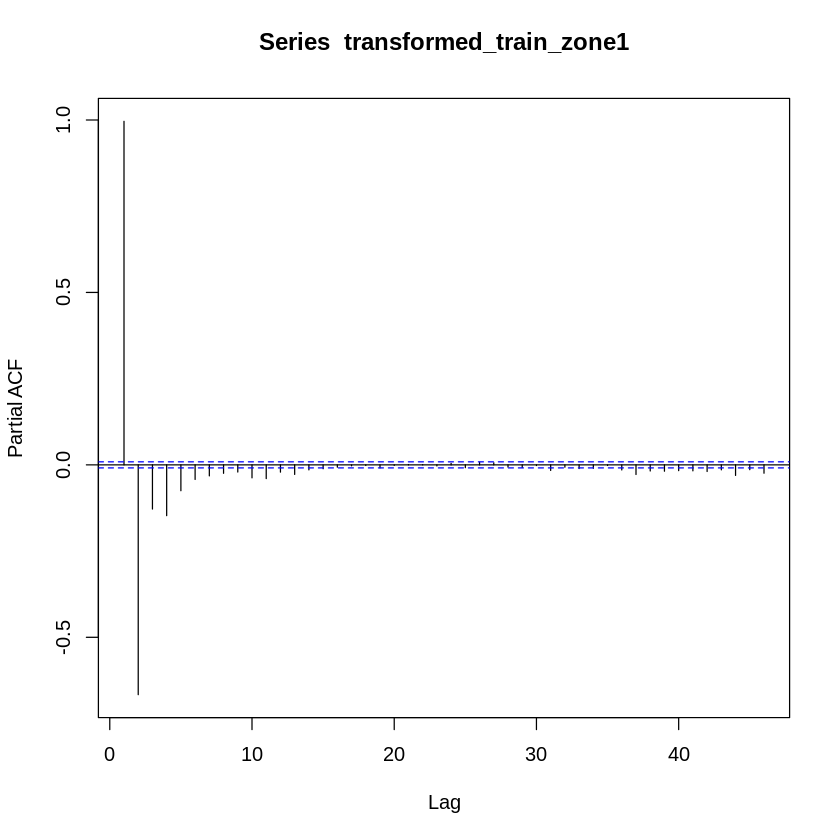

In [ ]:
# plotting the PACF in order to determine if the AR can fit our data with which order
pacf(transformed_train_zone1)

the PACF plot is not clear if it cuts off after lag 8 or it is considered to be decaying just like the ACF plot.

<br><br><br>
Therefore the condidate models are : **AR(8) or an ARMA model**.

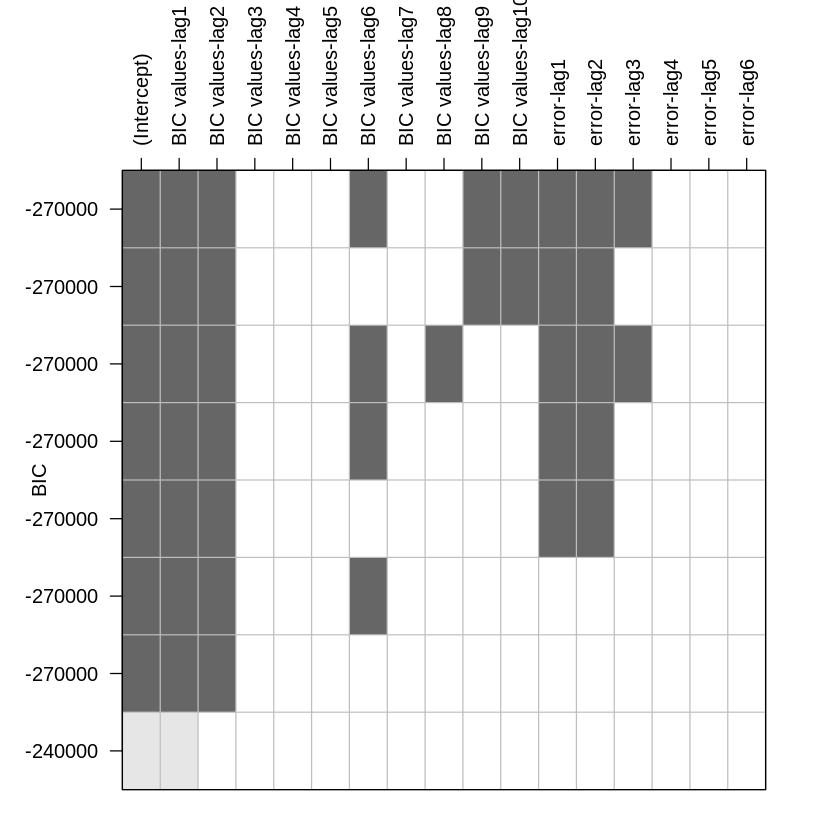

In [ ]:
# plotting the armasebsets with their BIC's to have a different condidate models
plot(armasubsets(transformed_train_zone1,nar=10,nma=6,y.name='BIC values',ar.method='mle'))

so The bic plot suggests many models which is a sign that model is not quite clear, therefore we will move forward with the first difference then redo the work again



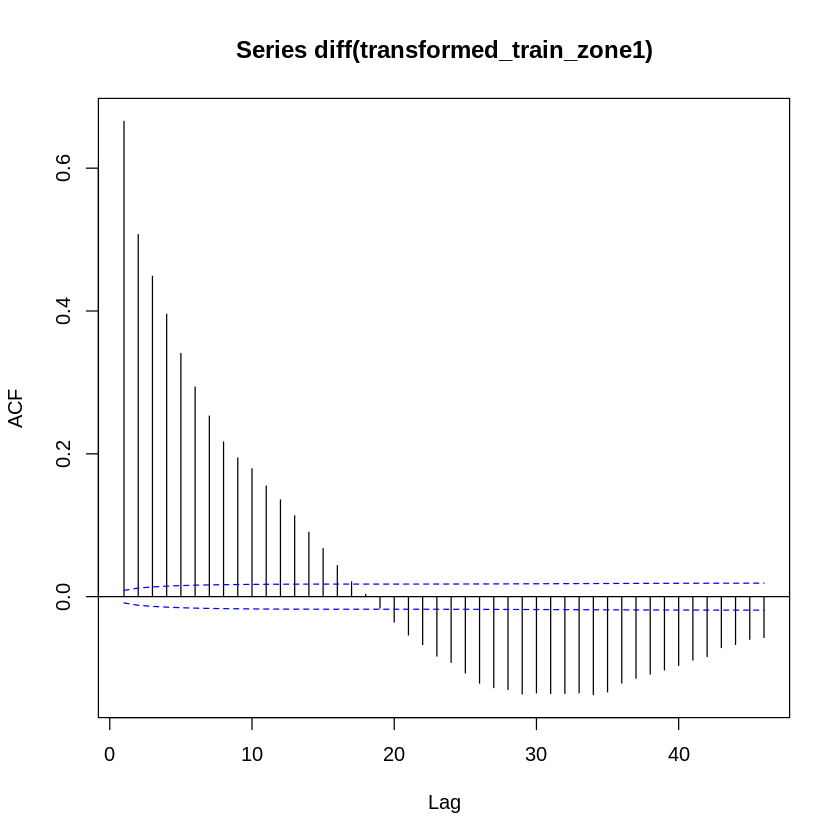

In [ ]:
# plotting the acf and pacf of the first difference of the transformed data of Zone1
acf(diff(transformed_train_zone1),ci.type='ma')

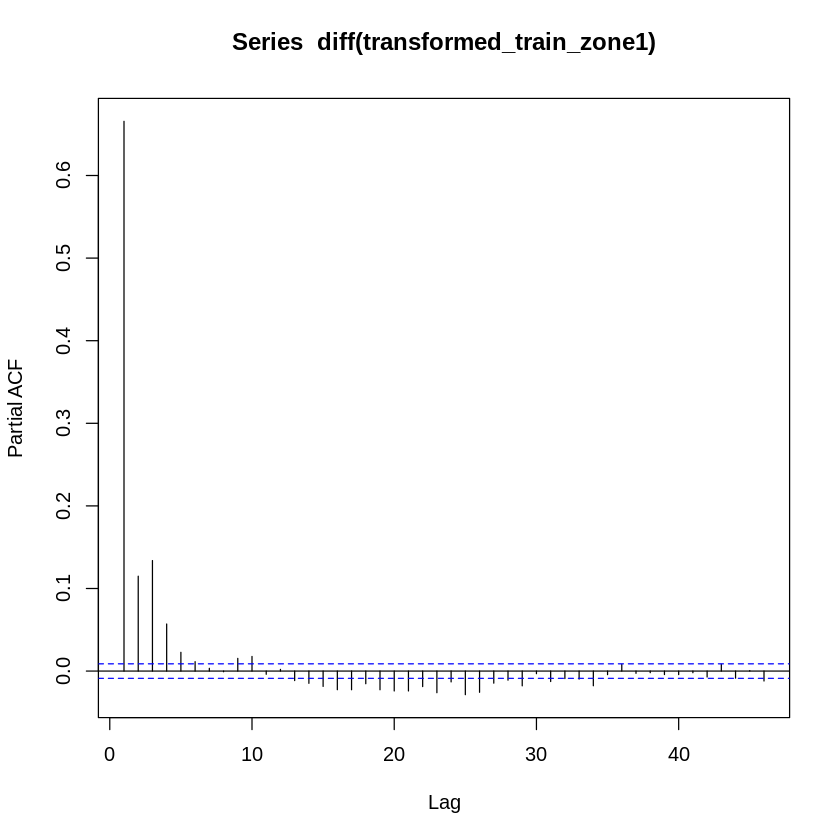

In [ ]:
# plotting the pacf of the transformed data after the first difference
pacf(diff(transformed_train_zone1))

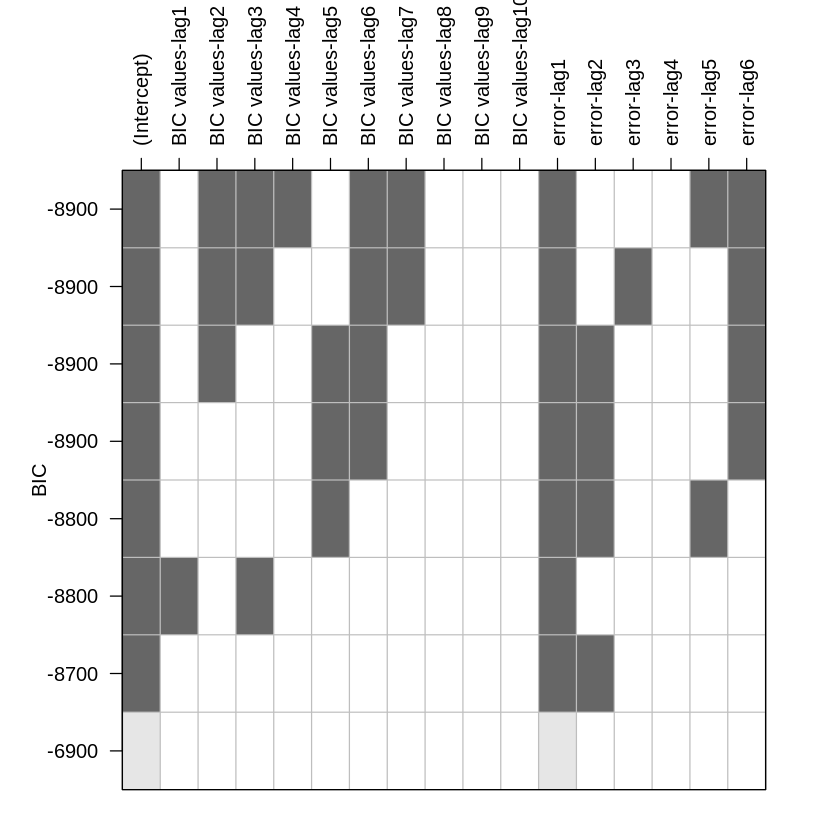

In [ ]:
plot(armasubsets(diff(transformed_train_zone1),nar=10,nma=6,y.name='BIC values',ar.method='mle'))

#   COMPARATIVE ANALYSIS

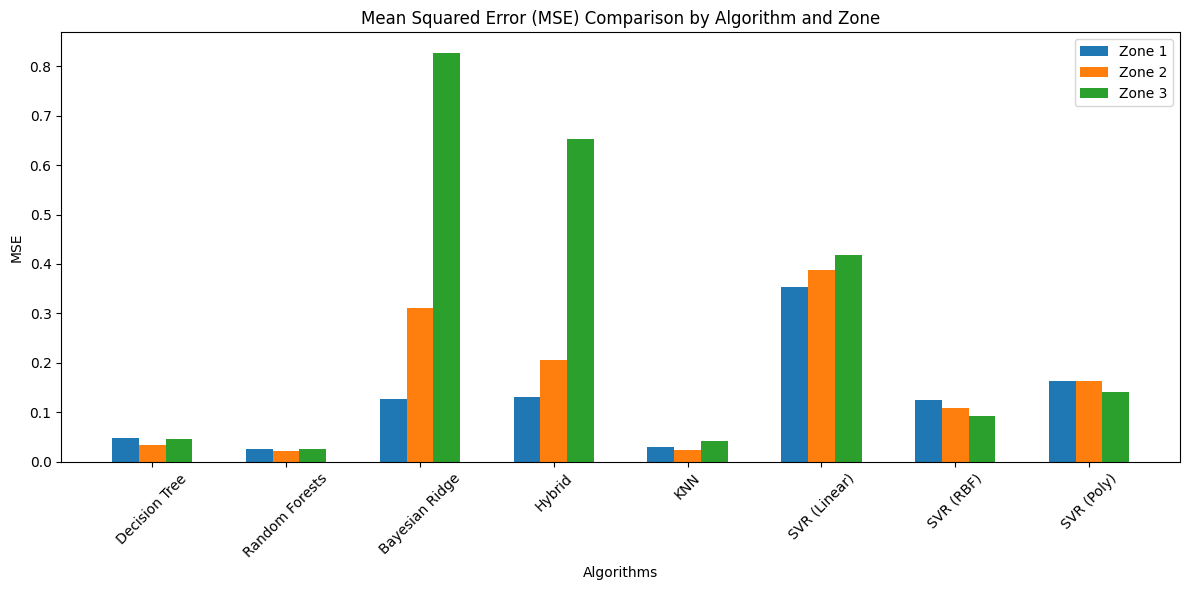

In [3]:
algorithms = ['Decision Tree', 'Random Forests', 'Bayesian Ridge', 'Hybrid', 'KNN', 'SVR (Linear)', 'SVR (RBF)', 'SVR (Poly)']
mse_zone1 = [0.048, 0.026, 0.127, 0.132, 0.0309, 0.354, 0.124, 0.164]
mse_zone2 = [0.034, 0.021, 0.310, 0.206, 0.024, 0.387, 0.108, 0.164]
mse_zone3 = [0.046, 0.025, 0.827, 0.653,0.042, 0.419, 0.092,0.1406]

# Plot
x = np.arange(len(algorithms))
width = 0.2

plt.figure(figsize=(12, 6))

plt.bar(x - width, mse_zone1, width, label='Zone 1')
plt.bar(x, mse_zone2, width, label='Zone 2')
plt.bar(x + width, mse_zone3, width, label='Zone 3')

plt.xlabel('Algorithms')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) Comparison by Algorithm and Zone')
plt.xticks(x, algorithms, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


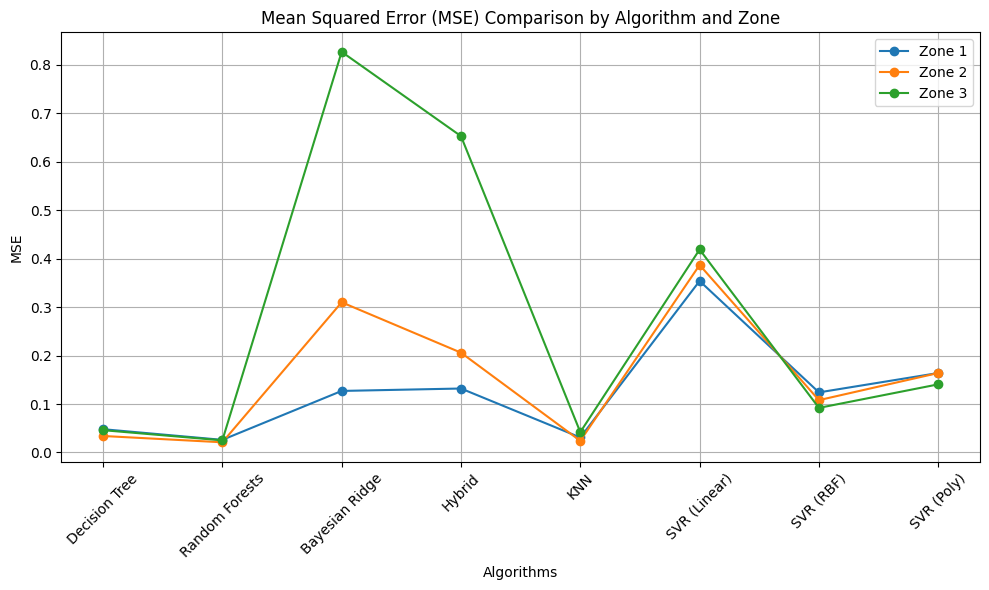

In [4]:
# Plot
x = range(len(algorithms))

plt.figure(figsize=(10, 6))

plt.plot(x, mse_zone1, marker='o', label='Zone 1')
plt.plot(x, mse_zone2, marker='o', label='Zone 2')
plt.plot(x, mse_zone3, marker='o', label='Zone 3')

plt.xlabel('Algorithms')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) Comparison by Algorithm and Zone')
plt.xticks(x, algorithms, rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()